In [2]:
import fiona
import shapely
from shapely.geometry import Point, LineString
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#shapely.speedups.disable()

In [3]:
fl_nm = r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\model\transect_clip.shp"
bln = gpd.read_file(fl_nm)

In [59]:
bln

,OBJECTID,midPointX,midPointY,slope,x1,x2,y1,y2,Shape_Leng,geometry
0,1,295869.664205,2.674091e+06,-0.840376,307353.110441,284386.217969,2.664440e+06,2.683741e+06,1553.287061,"LINESTRING (296371.232 2673669.054, 295182.093..."
1,2,295478.527430,2.673222e+06,-0.147517,310317.934890,280639.119969,2.671033e+06,2.675411e+06,1203.166609,"LINESTRING (295960.067 2673151.184, 294769.782..."
2,3,295615.722264,2.672291e+06,0.472965,309175.560996,282055.883532,2.678704e+06,2.665878e+06,1021.003403,"LINESTRING (296070.251 2672506.007, 295147.275..."
3,4,296175.837458,2.671495e+06,0.992543,306822.058785,285529.616130,2.682062e+06,2.660928e+06,1416.927815,"LINESTRING (296702.160 2672017.466, 295696.498..."
4,5,296921.731482,2.670835e+06,1.289704,306113.058581,287730.404383,2.682689e+06,2.658981e+06,1537.639627,"LINESTRING (297380.769 2671427.304, 296438.572..."
...,...,...,...,...,...,...,...,...,...,...
122,61,269064.523107,2.638186e+06,0.160526,283874.916362,254254.129852,2.640564e+06,2.635809e+06,2759.838097,"LINESTRING (269738.113 2638294.418, 267851.714..."
123,62,269248.723868,2.637204e+06,0.214824,283914.139635,254583.308102,2.640355e+06,2.634054e+06,2294.083444,"LINESTRING (269963.741 2637357.723, 268275.510..."
124,44,283214.654038,2.642541e+06,-2.596106,288606.374785,277822.933292,2.628544e+06,2.656539e+06,12129.421629,"LINESTRING (284255.174 2639840.039, 282615.003..."
125,81,265646.091739,2.618958e+06,-0.288628,280057.807968,251234.375509,2.614798e+06,2.623117e+06,13607.219917,"LINESTRING (271638.497 2616696.415, 258596.079..."


In [60]:
# #bln['geometry'].values[0].interiors
# i = 0
# for interior in bln['geometry'].values[0].interiors:
#     xy = interior.coords.xy
#     print(i)
#     i+=1

In [61]:
all_x = []
all_y = []
for idx,row in bln.iterrows():

    crds_x = np.ravel(row['geometry'].coords.xy[0])
    crds_y = np.ravel(row['geometry'].coords.xy[1])
    
    all_x.append(f'polygon_{idx}')
    all_y.append("")
    
    all_x.append(len(crds_x))
    all_y.append(2)
    
    for crds_xi, crds_yi in zip(crds_x, crds_y):
        all_x.append(crds_xi)
        all_y.append(crds_yi)
    
    #print(crds)

In [62]:
# idx = 0
# for interior in bln['geometry'].values[0].interiors:
#     crds_x = interior.coords.xy[0]
#     crds_y = interior.coords.xy[1]
    
    
#     all_x.append(f'polygon_{idx}')
#     all_y.append("")
    
#     all_x.append(len(crds_x))
#     all_y.append(2)
    
#     for crds_xi, crds_yi in zip(crds_x, crds_y):
#         all_x.append(crds_xi)
#         all_y.append(crds_yi)
    
#     idx+=1

In [63]:
ldb_dct = {
    'x':all_x,
    'y':all_y
}
ldb_df = pd.DataFrame(ldb_dct)

In [64]:
ldb_df.to_csv('transect_clip.ldb', index=False, header=False, sep='\t')

In [28]:
ldb_df

,x,y
0,polygon_0,
1,285,2
2,254515.0,2600671.0
3,254522.1017,2600692.8848
4,254650.0305,2600909.6768
...,...,...
2017,255943.01965,2584835.604872
2018,256466.895698,2583891.040483
2019,257133.647032,2582509.912721
2020,258086.148937,2580660.471522


## Center line and transects

In [20]:
centLn = gpd.read_file(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\model\centerline1.shp")

In [21]:
line = centLn['geometry'][0]

In [22]:
# Splitting at specified distance
distance_delta = 1000
distances = np.arange(0, line.length, distance_delta)
# or alternatively without NumPy:
# points_count = int(line.length // distance_delta) + 1
# distances = (distance_delta * i for i in range(points_count))
points1 = [np.ravel(line.interpolate(distance).coords.xy) for distance in distances] + [np.ravel(line.boundary[1].coords.xy)]
#multipoint1 = unary_union(points)  # or new_line = LineString(points)

In [23]:
# # Splitting at number of points
# n = 100
# # or to get the distances closest to the desired one:
# # n = round(line.length / desired_distance_delta)
# distances = np.linspace(0, line.length, n)
# # or alternatively without NumPy:
# # distances = (line.length * i / (n - 1) for i in range(n))
# points2 = [line.interpolate(distance) for distance in distances]
# multipoint2 = unary_union(points)  # or new_line = LineString(points)

In [24]:
pt_cd = points1.copy()#list(centLn['geometry'][0].coords)

In [25]:
md_pt = []
slope = []
for i in range(len(pt_cd)-1):
    p1 = pt_cd[i]
    p2 = pt_cd[i+1]
    #print(p1, p2)
    mdp = [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]
    slp = (p2[1]-p1[1])/(p2[0]-p1[0])
    md_pt.append(mdp)
    slope.append(-1/slp)

In [26]:
tr_dict = {    
    'midPointX': np.array(md_pt)[:,0],
    'midPointY': np.array(md_pt)[:,1],
    'slope': slope
}
trdf = pd.DataFrame(tr_dict)

In [27]:
distance = 15_000

In [28]:
trdf['x1'] = trdf.apply(lambda x: (distance**2/(1+x['slope']**2))**0.5+x['midPointX'], axis=1)
trdf['x2'] = trdf.apply(lambda x: -(distance**2/(1+x['slope']**2))**0.5+x['midPointX'], axis=1)
trdf['y1'] = trdf.apply(lambda x: (x['slope']*(x['x1']-x['midPointX']))+x['midPointY'], axis=1)
trdf['y2'] = trdf.apply(lambda x: (x['slope']*(x['x2']-x['midPointX']))+x['midPointY'], axis=1)

In [29]:
trdf['geometry'] = trdf.apply(lambda x: LineString([(x['x1'], x['y1']), (x['x2'], x['y2'])]), axis=1)

In [30]:
tr_line = gpd.GeoDataFrame(trdf, geometry=trdf['geometry'], crs=centLn.crs)

In [31]:
tr_line.to_file(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\model\transect.shp")

## grid text file modification

In [8]:
file_name = r'D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\raster\full_topo50.txt'
df = pd.read_csv(file_name)

In [9]:
df1 = df[['x', 'y', 'grid_code']].copy()

In [10]:
df1.rename(columns={"grid_code": "z"}, inplace=True)

In [11]:
df1.to_csv(r'D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\raster\full_topp50_xyz.xyz', index=False)

## Q-WL syncronize

In [3]:
wlData = pd.read_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\273_Bhairab Bazar_WL.xls")
qData = pd.read_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\273_Q.xls")

In [22]:
wlData['Year'] = wlData.apply(lambda x: x['DATETIME'].year, axis=1)
wlData['Month'] = wlData.apply(lambda x: x['DATETIME'].month, axis=1)
wlData['Day'] = wlData.apply(lambda x: x['DATETIME'].day, axis=1)

In [23]:
wlData.head()

,STATIONID,DATETIME,High,Low,avg,Year,Month,Day
0,273,2004-07-24,7.78,7.77,7.775,2004,7,24
1,273,2004-07-25,7.78,7.76,7.770,2004,7,25
2,273,2004-07-26,7.76,7.75,7.755,2004,7,26
3,273,2004-07-23,7.74,7.72,7.730,2004,7,23
4,273,2004-07-27,7.74,7.73,7.735,2004,7,27


In [24]:
wlData['avg'] = wlData.apply(lambda x: (x['High']+x['Low'])/2, axis=1)

In [28]:
qData['Year'] = qData.apply(lambda x: x['DATETIME'].year, axis=1)
qData['Month'] = qData.apply(lambda x: x['DATETIME'].month, axis=1)
qData['Day'] = qData.apply(lambda x: x['DATETIME'].day, axis=1)

In [41]:
qData['WL'] = np.nan

In [29]:
qData.head()

,STATIONID,DATETIME,TSVALUE_UPDATED,Year,Month,Day
0,273,1993-07-24,19900.0,1993,7,24
1,273,1993-07-25,19800.0,1993,7,25
2,273,1988-07-11,19800.0,1988,7,11
3,273,1988-07-09,19700.0,1988,7,9
4,273,1988-07-10,19700.0,1988,7,10


In [42]:
for idx,row in qData.iterrows():
    wl = wlData[(wlData['Year']==row['Year']) & (wlData['Month']==row['Month']) & (wlData['Day']==row['Day'])]
    try :
        wlv = wl['avg'].values[0]
        qData.loc[idx, 'WL'] = wlv
        print('WL:', wlv, 'index:', idx)
    except:
        qData.loc[idx, 'WL'] = np.nan
        print('N/A')
        pass

WL: 6.869999999999999 index: 0
WL: 6.915 index: 1
WL: 7.2 index: 2
WL: 7.035 index: 3
WL: 7.109999999999999 index: 4
WL: 7.26 index: 5
WL: 6.785 index: 6
WL: 7.65 index: 7
WL: 7.64 index: 8
WL: 6.93 index: 9
WL: 7.265 index: 10
WL: 6.865 index: 11
WL: 7.27 index: 12
WL: 7.61 index: 13
WL: 7.62 index: 14
WL: 6.63 index: 15
WL: 6.92 index: 16
WL: 7.275 index: 17
WL: 7.58 index: 18
WL: 7.56 index: 19
WL: 7.56 index: 20
WL: 7.55 index: 21
WL: 7.56 index: 22
WL: 7.235 index: 23
WL: 6.65 index: 24
WL: 6.41 index: 25
WL: 6.890000000000001 index: 26
WL: 7.53 index: 27
WL: 7.53 index: 28
WL: 7.2 index: 29
WL: 6.365 index: 30
WL: 6.42 index: 31
WL: 7.48 index: 32
WL: 7.41 index: 33
WL: 7.605 index: 34
WL: 7.645 index: 35
WL: 7.615 index: 36
WL: 7.550000000000001 index: 37
WL: 7.475 index: 38
WL: 6.415 index: 39
WL: 6.39 index: 40
WL: 6.859999999999999 index: 41
WL: 7.154999999999999 index: 42
WL: 7.645 index: 43
WL: 7.46 index: 44
WL: 7.390000000000001 index: 45
WL: 6.26 index: 46
WL: 6.40499999

WL: 6.595000000000001 index: 474
WL: 6.640000000000001 index: 475
WL: 6.824999999999999 index: 476
WL: 6.805 index: 477
WL: 6.82 index: 478
WL: 6.005 index: 479
WL: 5.605 index: 480
WL: 6.365 index: 481
WL: 6.35 index: 482
WL: 6.215 index: 483
WL: 7.175 index: 484
WL: 7.33 index: 485
N/A
WL: 6.92 index: 487
WL: 6.94 index: 488
WL: 6.69 index: 489
WL: 6.69 index: 490
WL: 6.71 index: 491
WL: 6.295 index: 492
WL: 6.41 index: 493
WL: 6.255 index: 494
WL: 6.125 index: 495
WL: 6.505 index: 496
WL: 6.8 index: 497
WL: 6.779999999999999 index: 498
WL: 6.744999999999999 index: 499
WL: 6.79 index: 500
WL: 6.445 index: 501
WL: 6.52 index: 502
WL: 6.0649999999999995 index: 503
WL: 6.345 index: 504
WL: 6.3100000000000005 index: 505
N/A
WL: 6.92 index: 507
WL: 6.92 index: 508
WL: 6.92 index: 509
WL: 6.91 index: 510
WL: 6.66 index: 511
WL: 6.66 index: 512
WL: 6.66 index: 513
WL: 6.66 index: 514
WL: 6.66 index: 515
WL: 6.66 index: 516
WL: 6.66 index: 517
WL: 6.37 index: 518
WL: 6.21 index: 519
WL: 6.27

WL: 6.14 index: 956
WL: 5.795 index: 957
WL: 5.955 index: 958
WL: 6.165 index: 959
WL: 6.27 index: 960
WL: 6.16 index: 961
WL: 5.8149999999999995 index: 962
WL: 6.485 index: 963
WL: 6.445 index: 964
WL: 6.035 index: 965
WL: 5.835 index: 966
WL: 5.83 index: 967
WL: 6.055 index: 968
WL: 5.845 index: 969
WL: 5.59 index: 970
WL: 5.529999999999999 index: 971
WL: 6.255000000000001 index: 972
WL: 7.279999999999999 index: 973
WL: 6.355 index: 974
WL: 6.33 index: 975
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 6.16 index: 985
WL: 6.59 index: 986
WL: 6.56 index: 987
WL: 6.31 index: 988
WL: 6.27 index: 989
WL: 6.27 index: 990
WL: 6.27 index: 991
WL: 6.27 index: 992
WL: 6.22 index: 993
WL: 6.15 index: 994
WL: 6.15 index: 995
WL: 6.19 index: 996
WL: 5.8 index: 997
WL: 6.109999999999999 index: 998
WL: 6.1 index: 999
WL: 5.8149999999999995 index: 1000
WL: 6.175 index: 1001
WL: 5.74 index: 1002
WL: 5.845 index: 1003
WL: 5.76 index: 1004
WL: 4.99 index: 1005
WL: 4.995 index: 1006
WL: 6.05 index: 1007
WL: 6

WL: 5.97 index: 1417
WL: 5.65 index: 1418
WL: 5.66 index: 1419
WL: 5.65 index: 1420
WL: 6.045 index: 1421
WL: 5.8 index: 1422
WL: 5.94 index: 1423
WL: 5.57 index: 1424
WL: 5.695 index: 1425
WL: 5.745 index: 1426
WL: 5.74 index: 1427
WL: 5.7 index: 1428
WL: 5.654999999999999 index: 1429
WL: 5.975 index: 1430
WL: 5.955 index: 1431
WL: 5.92 index: 1432
WL: 5.6850000000000005 index: 1433
WL: 5.695 index: 1434
WL: 5.925 index: 1435
WL: 5.720000000000001 index: 1436
WL: 5.73 index: 1437
WL: 5.9399999999999995 index: 1438
WL: 5.615 index: 1439
WL: 5.77 index: 1440
WL: 5.555 index: 1441
WL: 5.57 index: 1442
WL: 5.59 index: 1443
WL: 5.54 index: 1444
WL: 5.5649999999999995 index: 1445
WL: 5.6 index: 1446
WL: 5.6 index: 1447
WL: 5.6 index: 1448
WL: 5.635 index: 1449
WL: 5.64 index: 1450
WL: 5.945 index: 1451
WL: 5.965 index: 1452
WL: 6.0 index: 1453
WL: 4.865 index: 1454
WL: 5.375 index: 1455
WL: 5.835 index: 1456
WL: 6.3149999999999995 index: 1457
WL: 7.605 index: 1458
WL: 7.73 index: 1459
WL: 6

N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 6.14 index: 1901
WL: 6.25 index: 1902
WL: 6.09 index: 1903
WL: 6.15 index: 1904
WL: 6.2 index: 1905
WL: 5.95 index: 1906
WL: 6.45 index: 1907
WL: 6.45 index: 1908
WL: 6.46 index: 1909
WL: 6.43 index: 1910
WL: 6.13 index: 1911
WL: 5.92 index: 1912
WL: 5.82 index: 1913
WL: 5.82 index: 1914
WL: 5.81 index: 1915
WL: 5.82 index: 1916
WL: 5.72 index: 1917
WL: 5.93 index: 1918
WL: 5.65 index: 1919
WL: 5.69 index: 1920
WL: 5.77 index: 1921
WL: 5.455 index: 1922
WL: 5.795 index: 1923
WL: 5.55 index: 1924
WL: 5.205 index: 1925
WL: 5.485 index: 1926
WL: 5.645 index: 1927
WL: 6.18 index: 1928
WL: 6.09 index: 1929
WL: 5.245 index: 1930
WL: 5.45 index: 1931
WL: 5.68 index: 1932
WL: 5.67 index: 1933
WL: 5.655 index: 1934
WL: 5.655 index: 1935
WL: 5.5649999999999995 index: 1936
WL: 5.48 index: 1937
WL: 5.2 index: 1938
WL: 5.41 index: 1939
WL: 5.715 index: 1940
WL: 5.94 index: 1941
WL: 5.965 index: 1942
WL: 5.85 index: 1943
WL: 5.76 index: 1944
WL: 5.765 index: 1945


WL: 5.0649999999999995 index: 2372
WL: 5.735 index: 2373
N/A
N/A
N/A
WL: 5.6 index: 2377
WL: 5.720000000000001 index: 2378
WL: 5.525 index: 2379
WL: 6.115 index: 2380
WL: 5.125 index: 2381
WL: 5.755000000000001 index: 2382
WL: 5.58 index: 2383
WL: 4.975 index: 2384
WL: 6.825 index: 2385
WL: 5.61 index: 2386
WL: 6.4399999999999995 index: 2387
WL: 5.1850000000000005 index: 2388
WL: 5.615 index: 2389
WL: 5.95 index: 2390
WL: 5.95 index: 2391
WL: 5.95 index: 2392
WL: 5.94 index: 2393
WL: 5.94 index: 2394
WL: 5.93 index: 2395
WL: 5.82 index: 2396
WL: 5.82 index: 2397
WL: 5.82 index: 2398
WL: 5.82 index: 2399
WL: 5.59 index: 2400
WL: 4.99 index: 2401
WL: 5.015000000000001 index: 2402
WL: 5.795 index: 2403
WL: 5.58 index: 2404
WL: 5.615 index: 2405
WL: 4.665 index: 2406
WL: 5.705 index: 2407
WL: 5.465 index: 2408
WL: 5.775 index: 2409
WL: 5.789999999999999 index: 2410
WL: 5.205 index: 2411
WL: 5.615 index: 2412
WL: 4.98 index: 2413
WL: 6.8 index: 2414
N/A
N/A
N/A
N/A
WL: 5.61 index: 2419
WL: 

WL: 6.1 index: 2855
WL: 6.1 index: 2856
WL: 5.15 index: 2857
WL: 5.15 index: 2858
WL: 5.154999999999999 index: 2859
WL: 5.425 index: 2860
WL: 5.54 index: 2861
WL: 4.555 index: 2862
WL: 6.1850000000000005 index: 2863
N/A
WL: 5.72 index: 2865
WL: 5.72 index: 2866
WL: 5.375 index: 2867
WL: 5.29 index: 2868
WL: 5.13 index: 2869
WL: 5.585 index: 2870
WL: 5.495 index: 2871
WL: 5.66 index: 2872
WL: 6.09 index: 2873
WL: 4.9 index: 2874
WL: 5.36 index: 2875
WL: 5.155 index: 2876
WL: 5.359999999999999 index: 2877
WL: 5.5 index: 2878
WL: 5.505 index: 2879
WL: 4.925 index: 2880
WL: 5.16 index: 2881
WL: 4.67 index: 2882
WL: 5.470000000000001 index: 2883
WL: 4.92 index: 2884
WL: 4.9399999999999995 index: 2885
WL: 5.6850000000000005 index: 2886
WL: 5.585 index: 2887
N/A
N/A
WL: 6.08 index: 2890
WL: 6.08 index: 2891
WL: 6.08 index: 2892
WL: 6.08 index: 2893
WL: 6.08 index: 2894
WL: 6.08 index: 2895
WL: 5.38 index: 2896
WL: 5.63 index: 2897
WL: 5.715 index: 2898
WL: 5.4350000000000005 index: 2899
WL: 5

WL: 5.2 index: 3340
N/A
WL: 5.85 index: 3342
WL: 5.84 index: 3343
WL: 5.84 index: 3344
WL: 4.7 index: 3345
WL: 4.68 index: 3346
WL: 4.94 index: 3347
WL: 5.275 index: 3348
WL: 5.93 index: 3349
WL: 4.27 index: 3350
WL: 4.824999999999999 index: 3351
WL: 5.925000000000001 index: 3352
WL: 5.885 index: 3353
WL: 5.49 index: 3354
WL: 5.12 index: 3355
WL: 5.08 index: 3356
WL: 4.835 index: 3357
WL: 5.279999999999999 index: 3358
WL: 5.83 index: 3359
WL: 5.83 index: 3360
WL: 5.51 index: 3361
WL: 5.5 index: 3362
WL: 5.52 index: 3363
WL: 5.52 index: 3364
WL: 5.51 index: 3365
WL: 5.855 index: 3366
WL: 4.58 index: 3367
WL: 5.279999999999999 index: 3368
WL: 5.405 index: 3369
WL: 5.305 index: 3370
WL: 4.640000000000001 index: 3371
WL: 4.67 index: 3372
WL: 5.875 index: 3373
WL: 4.1850000000000005 index: 3374
N/A
N/A
WL: 5.33 index: 3377
WL: 5.82 index: 3378
WL: 5.45 index: 3379
WL: 5.395 index: 3380
WL: 5.255 index: 3381
WL: 5.835 index: 3382
WL: 5.89 index: 3383
WL: 5.03 index: 3384
WL: 5.56499999999999

WL: 5.325 index: 3826
WL: 5.48 index: 3827
WL: 5.245 index: 3828
WL: 4.81 index: 3829
WL: 5.425 index: 3830
WL: 4.755 index: 3831
WL: 4.21 index: 3832
WL: 5.26 index: 3833
WL: 5.24 index: 3834
WL: 5.14 index: 3835
WL: 5.12 index: 3836
WL: 5.09 index: 3837
WL: 5.06 index: 3838
WL: 5.0 index: 3839
WL: 4.720000000000001 index: 3840
WL: 4.55 index: 3841
WL: 5.265000000000001 index: 3842
WL: 4.795 index: 3843
WL: 3.785 index: 3844
WL: 5.055 index: 3845
WL: 4.734999999999999 index: 3846
WL: 2.9050000000000002 index: 3847
WL: 4.4 index: 3848
WL: 4.380000000000001 index: 3849
N/A
WL: 5.58 index: 3851
WL: 5.56 index: 3852
WL: 5.6 index: 3853
WL: 5.54 index: 3854
WL: 5.54 index: 3855
WL: 5.54 index: 3856
WL: 5.53 index: 3857
WL: 5.53 index: 3858
WL: 5.53 index: 3859
WL: 5.18 index: 3860
WL: 5.31 index: 3861
WL: 5.3 index: 3862
WL: 5.29 index: 3863
WL: 4.46 index: 3864
WL: 5.35 index: 3865
WL: 5.37 index: 3866
WL: 4.359999999999999 index: 3867
WL: 5.205 index: 3868
WL: 4.76 index: 3869
WL: 4.495 

WL: 5.06 index: 4318
WL: 5.01 index: 4319
WL: 3.455 index: 4320
WL: 4.05 index: 4321
WL: 3.84 index: 4322
WL: 3.425 index: 4323
WL: 4.029999999999999 index: 4324
WL: 4.245 index: 4325
WL: 4.5600000000000005 index: 4326
WL: 4.355 index: 4327
WL: 3.62 index: 4328
N/A
WL: 4.36 index: 4330
WL: 4.27 index: 4331
N/A
WL: 5.085 index: 4333
WL: 4.27 index: 4334
WL: 3.835 index: 4335
WL: 4.35 index: 4336
WL: 4.275 index: 4337
WL: 4.355 index: 4338
WL: 4.96 index: 4339
WL: 4.2 index: 4340
WL: 3.6500000000000004 index: 4341
WL: 4.12 index: 4342
WL: 4.295 index: 4343
WL: 4.175 index: 4344
WL: 3.9299999999999997 index: 4345
N/A
WL: 4.33 index: 4347
WL: 4.45 index: 4348
WL: 4.390000000000001 index: 4349
WL: 4.68 index: 4350
WL: 5.02 index: 4351
WL: 4.98 index: 4352
WL: 4.645 index: 4353
WL: 4.045 index: 4354
WL: 3.075 index: 4355
WL: 3.755 index: 4356
WL: 3.86 index: 4357
WL: 4.285 index: 4358
WL: 3.965 index: 4359
WL: 3.3899999999999997 index: 4360
N/A
N/A
WL: 4.115 index: 4363
WL: 4.18 index: 4364


WL: 3.615 index: 4811
WL: 2.585 index: 4812
WL: 3.3899999999999997 index: 4813
WL: 4.24 index: 4814
WL: 4.45 index: 4815
WL: 2.59 index: 4816
WL: 3.375 index: 4817
WL: 3.4050000000000002 index: 4818
WL: 3.98 index: 4819
WL: 4.29 index: 4820
WL: 3.795 index: 4821
WL: 3.2350000000000003 index: 4822
WL: 3.99 index: 4823
WL: 3.685 index: 4824
WL: 3.78 index: 4825
WL: 4.44 index: 4826
WL: 4.02 index: 4827
WL: 3.77 index: 4828
WL: 3.3899999999999997 index: 4829
WL: 3.125 index: 4830
WL: 3.32 index: 4831
WL: 3.0599999999999996 index: 4832
N/A
N/A
WL: 3.85 index: 4835
WL: 4.359999999999999 index: 4836
WL: 3.755 index: 4837
WL: 4.01 index: 4838
WL: 4.01 index: 4839
WL: 4.01 index: 4840
WL: 4.01 index: 4841
WL: 4.01 index: 4842
WL: 3.88 index: 4843
WL: 4.32 index: 4844
WL: 3.7350000000000003 index: 4845
WL: 3.205 index: 4846
WL: 3.135 index: 4847
N/A
WL: 2.585 index: 4849
N/A
N/A
WL: 3.645 index: 4852
WL: 3.355 index: 4853
WL: 3.3449999999999998 index: 4854
N/A
WL: 3.57 index: 4856
WL: 3.325 ind

WL: 2.4000000000000004 index: 5304
WL: 3.49 index: 5305
WL: 3.84 index: 5306
N/A
WL: 3.39 index: 5308
WL: 3.3899999999999997 index: 5309
WL: 3.58 index: 5310
WL: 3.58 index: 5311
WL: 3.355 index: 5312
WL: 2.66 index: 5313
WL: 3.66 index: 5314
WL: 2.42 index: 5315
WL: 3.49 index: 5316
WL: 3.0 index: 5317
WL: 2.0949999999999998 index: 5318
WL: 2.645 index: 5319
WL: 2.6100000000000003 index: 5320
WL: 2.695 index: 5321
N/A
WL: 3.39 index: 5323
WL: 3.76 index: 5324
WL: 3.9 index: 5325
WL: 3.3200000000000003 index: 5326
WL: 2.7 index: 5327
WL: 2.475 index: 5328
WL: 3.375 index: 5329
WL: 3.615 index: 5330
WL: 2.76 index: 5331
WL: 2.7199999999999998 index: 5332
WL: 2.2800000000000002 index: 5333
WL: 2.6500000000000004 index: 5334
N/A
WL: 3.71 index: 5336
WL: 3.74 index: 5337
WL: 3.37 index: 5338
WL: 3.365 index: 5339
WL: 3.365 index: 5340
WL: 3.365 index: 5341
WL: 3.475 index: 5342
WL: 3.365 index: 5343
WL: 3.365 index: 5344
WL: 3.7649999999999997 index: 5345
WL: 2.5 index: 5346
WL: 3.815 inde

N/A
WL: 3.0149999999999997 index: 5797
WL: 3.01 index: 5798
WL: 3.005 index: 5799
WL: 2.81 index: 5800
WL: 2.66 index: 5801
WL: 2.0700000000000003 index: 5802
N/A
WL: 3.28 index: 5804
WL: 3.17 index: 5805
WL: 3.01 index: 5806
WL: 3.005 index: 5807
WL: 3.3049999999999997 index: 5808
WL: 2.575 index: 5809
WL: 3.01 index: 5810
WL: 3.005 index: 5811
WL: 3.12 index: 5812
WL: 1.585 index: 5813
WL: 1.405 index: 5814
WL: 2.995 index: 5815
WL: 3.355 index: 5816
WL: 2.645 index: 5817
WL: 2.65 index: 5818
WL: 2.605 index: 5819
WL: 2.605 index: 5820
WL: 2.69 index: 5821
WL: 1.645 index: 5822
WL: 2.8499999999999996 index: 5823
WL: 3.075 index: 5824
WL: 2.05 index: 5825
WL: 2.0 index: 5826
N/A
N/A
WL: 2.99 index: 5829
WL: 2.99 index: 5830
WL: 2.88 index: 5831
WL: 2.995 index: 5832
N/A
WL: 2.985 index: 5834
WL: 2.645 index: 5835
WL: 2.6399999999999997 index: 5836
WL: 2.515 index: 5837
WL: 2.015 index: 5838
N/A
N/A
WL: 3.09 index: 5841
WL: 3.5199999999999996 index: 5842
WL: 2.63 index: 5843
WL: 2.63 i

WL: 2.91 index: 6288
WL: 1.505 index: 6289
WL: 1.5150000000000001 index: 6290
WL: 2.915 index: 6291
WL: 1.505 index: 6292
WL: 2.6 index: 6293
WL: 2.6 index: 6294
WL: 2.6 index: 6295
WL: 2.495 index: 6296
WL: 2.5 index: 6297
WL: 2.5 index: 6298
WL: 2.5 index: 6299
N/A
N/A
WL: 2.59 index: 6302
WL: 2.5949999999999998 index: 6303
WL: 2.59 index: 6304
WL: 2.94 index: 6305
WL: 1.48 index: 6306
WL: 2.925 index: 6307
WL: 2.93 index: 6308
WL: 1.495 index: 6309
WL: 2.585 index: 6310
WL: 2.585 index: 6311
WL: 2.585 index: 6312
N/A
N/A
N/A
WL: 2.575 index: 6316
WL: 2.34 index: 6317
WL: 1.505 index: 6318
WL: 1.47 index: 6319
WL: 2.885 index: 6320
WL: 2.1550000000000002 index: 6321
WL: 2.49 index: 6322
WL: 1.4700000000000002 index: 6323
WL: 1.43 index: 6324
WL: 1.415 index: 6325
WL: 2.57 index: 6326
WL: 2.57 index: 6327
WL: 2.57 index: 6328
WL: 2.4450000000000003 index: 6329
WL: 2.87 index: 6330
WL: 2.255 index: 6331
WL: 2.42 index: 6332
WL: 1.455 index: 6333
N/A
N/A
N/A
N/A
N/A
N/A
WL: 2.56 index: 

WL: 2.145 index: 6791
WL: 2.15 index: 6792
WL: 2.15 index: 6793
WL: 2.15 index: 6794
WL: 2.145 index: 6795
WL: 2.15 index: 6796
WL: 2.1500000000000004 index: 6797
WL: 2.3899999999999997 index: 6798
WL: 2.39 index: 6799
WL: 2.375 index: 6800
WL: 2.1399999999999997 index: 6801
WL: 2.1399999999999997 index: 6802
WL: 2.1399999999999997 index: 6803
WL: 2.145 index: 6804
WL: 2.035 index: 6805
WL: 2.15 index: 6806
WL: 2.1550000000000002 index: 6807
WL: 2.375 index: 6808
WL: 1.975 index: 6809
N/A
N/A
N/A
WL: 2.135 index: 6813
WL: 2.135 index: 6814
WL: 2.135 index: 6815
WL: 2.13 index: 6816
WL: 2.135 index: 6817
WL: 2.365 index: 6818
WL: 2.125 index: 6819
WL: 2.13 index: 6820
WL: 2.1550000000000002 index: 6821
WL: 2.125 index: 6822
WL: 2.36 index: 6823
WL: 2.12 index: 6824
N/A
N/A
N/A
N/A
N/A
N/A
WL: 2.115 index: 6831
WL: 2.115 index: 6832
WL: 2.115 index: 6833
WL: 2.12 index: 6834
WL: 2.115 index: 6835
WL: 2.3449999999999998 index: 6836
WL: 2.35 index: 6837
WL: 2.3449999999999998 index: 6838
W

N/A
WL: 1.775 index: 7299
WL: 1.7799999999999998 index: 7300
WL: 1.775 index: 7301
WL: 1.775 index: 7302
WL: 1.775 index: 7303
WL: 1.775 index: 7304
WL: 1.775 index: 7305
WL: 1.945 index: 7306
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.77 index: 7316
WL: 1.7650000000000001 index: 7317
WL: 1.77 index: 7318
WL: 1.77 index: 7319
WL: 1.77 index: 7320
WL: 1.77 index: 7321
WL: 1.77 index: 7322
WL: 1.77 index: 7323
WL: 1.77 index: 7324
WL: 1.7999999999999998 index: 7325
WL: 1.77 index: 7326
WL: 1.645 index: 7327
WL: 1.7599999999999998 index: 7328
WL: 1.7599999999999998 index: 7329
WL: 1.76 index: 7330
WL: 1.76 index: 7331
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.78 index: 7342
WL: 1.75 index: 7343
WL: 1.75 index: 7344
WL: 1.755 index: 7345
WL: 1.755 index: 7346
WL: 1.75 index: 7347
WL: 1.75 index: 7348
WL: 1.75 index: 7349
WL: 1.75 index: 7350
WL: 1.75 index: 7351
WL: 1.7349999999999999 index: 7352
WL: 1.75 index: 7353
WL: 1.755 index: 7354
WL: 1.755 index: 7355
WL: 1.755 index: 7356
WL: 

WL: 1.67 index: 7812
WL: 1.9 index: 7813
N/A
WL: 1.655 index: 7815
WL: 1.6600000000000001 index: 7816
WL: 1.5299999999999998 index: 7817
WL: 1.885 index: 7818
WL: 1.8900000000000001 index: 7819
WL: 1.885 index: 7820
WL: 1.8900000000000001 index: 7821
WL: 1.535 index: 7822
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.52 index: 7829
WL: 1.5150000000000001 index: 7830
WL: 1.515 index: 7831
WL: 1.525 index: 7832
WL: 1.525 index: 7833
WL: 1.52 index: 7834
WL: 1.525 index: 7835
WL: 1.525 index: 7836
WL: 1.525 index: 7837
WL: 1.525 index: 7838
WL: 1.525 index: 7839
WL: 1.52 index: 7840
WL: 1.52 index: 7841
WL: 1.65 index: 7842
WL: 1.65 index: 7843
WL: 1.795 index: 7844
WL: 1.795 index: 7845
WL: 1.52 index: 7846
WL: 1.875 index: 7847
WL: 1.88 index: 7848
WL: 1.5150000000000001 index: 7849
WL: 1.515 index: 7850
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.505 index: 7858
WL: 1.51 index: 7859
WL: 1.505 index: 7860
WL: 1.51 index: 7861
WL: 1.5150000000000001 index: 7862
WL: 1.555 index: 7863
WL: 1.51 index: 7864
WL: 1.51 

WL: 1.255 index: 8309
WL: 1.615 index: 8310
WL: 1.395 index: 8311
WL: 1.4 index: 8312
N/A
N/A
N/A
N/A
N/A
WL: 1.235 index: 8318
WL: 1.2599999999999998 index: 8319
WL: 1.25 index: 8320
WL: 1.265 index: 8321
WL: 1.25 index: 8322
WL: 1.25 index: 8323
WL: 1.515 index: 8324
WL: 1.385 index: 8325
WL: 1.525 index: 8326
WL: 1.5150000000000001 index: 8327
WL: 1.585 index: 8328
WL: 1.7400000000000002 index: 8329
WL: 1.505 index: 8330
WL: 1.24 index: 8331
WL: 1.6 index: 8332
WL: 1.375 index: 8333
WL: 1.38 index: 8334
WL: 1.375 index: 8335
N/A
N/A
N/A
N/A
N/A
WL: 1.235 index: 8341
WL: 1.2349999999999999 index: 8342
WL: 1.2349999999999999 index: 8343
WL: 1.235 index: 8344
WL: 1.2349999999999999 index: 8345
WL: 1.2349999999999999 index: 8346
WL: 1.2349999999999999 index: 8347
WL: 1.2349999999999999 index: 8348
WL: 1.495 index: 8349
WL: 1.5 index: 8350
WL: 1.495 index: 8351
WL: 1.5699999999999998 index: 8352
WL: 1.565 index: 8353
WL: 1.565 index: 8354
WL: 1.5699999999999998 index: 8355
WL: 1.585 inde

In [43]:
qData

,STATIONID,DATETIME,TSVALUE_UPDATED,Year,Month,Day,WL
0,273,1993-07-24,19900.0,1993,7,24,6.870
1,273,1993-07-25,19800.0,1993,7,25,6.915
2,273,1988-07-11,19800.0,1988,7,11,7.200
3,273,1988-07-09,19700.0,1988,7,9,7.035
4,273,1988-07-10,19700.0,1988,7,10,7.110
...,...,...,...,...,...,...,...
8620,273,1986-02-21,4.0,1986,2,21,0.935
8621,273,1986-02-22,3.0,1986,2,22,0.930
8622,273,1988-01-28,3.0,1988,1,28,1.160
8623,273,1988-01-29,2.0,1988,1,29,1.125


In [45]:
qData.to_csv(r'D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\273QWL.csv')

## 273 and 276 WL correlation

In [87]:
data277 = pd.read_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\Chandpur_277_filled_2018.xls")
data276 = pd.read_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\276_Satnal_WL.xls")

In [88]:
data277['Year'] = data277.apply(lambda x: x['DATETIME'].year, axis=1)
data277['Month'] = data277.apply(lambda x: x['DATETIME'].month, axis=1)
data277['Day'] = data277.apply(lambda x: x['DATETIME'].day, axis=1)
data277['avg'] = data277.apply(lambda x: (x['High']+x['Low'])/2, axis=1)

In [89]:
data277

,STATIONID,DATETIME,High,Low,Year,Month,Day,avg
0,277,1947-07-25,4.22,3.55,1947,7,25,3.885
1,277,1947-07-26,4.20,3.52,1947,7,26,3.860
2,277,1947-07-27,4.10,3.44,1947,7,27,3.770
3,277,1947-07-28,4.14,3.58,1947,7,28,3.860
4,277,1947-07-29,4.25,3.61,1947,7,29,3.930
...,...,...,...,...,...,...,...,...
22523,277,2018-12-27,1.96,0.80,2018,12,27,1.380
22524,277,2018-12-28,1.94,0.78,2018,12,28,1.360
22525,277,2018-12-29,1.94,0.86,2018,12,29,1.400
22526,277,2018-12-30,1.64,0.78,2018,12,30,1.210


In [90]:
data276['Year'] = data276.apply(lambda x: x['DATETIME'].year, axis=1)
data276['Month'] = data276.apply(lambda x: x['DATETIME'].month, axis=1)
data276['Day'] = data276.apply(lambda x: x['DATETIME'].day, axis=1)
data276['avg'] = data276.apply(lambda x: (x['High']+x['Low'])/2, axis=1)

In [91]:
data276

,STATIONID,DATETIME,High,Low,Year,Month,Day,avg
0,276,2004-07-22,6.62,6.51,2004,7,22,6.565
1,276,2004-07-21,6.52,6.46,2004,7,21,6.490
2,276,2004-07-20,6.49,6.33,2004,7,20,6.410
3,276,2004-07-18,6.44,6.22,2004,7,18,6.330
4,276,2004-07-19,6.42,6.26,2004,7,19,6.340
...,...,...,...,...,...,...,...,...
18467,276,1983-01-24,0.10,0.08,1983,1,24,0.090
18468,276,1983-03-09,0.10,0.07,1983,3,9,0.085
18469,276,1983-02-05,0.08,0.06,1983,2,5,0.070
18470,276,1983-02-06,0.08,0.06,1983,2,6,0.070


In [92]:
data276['WL277'] = np.nan

In [93]:
for idx,row in data276.iterrows():
    wl = data277[(data277['Year']==row['Year']) & (data277['Month']==row['Month']) & (data277['Day']==row['Day'])]
    try :
        wlv = wl['avg'].values[0]
        data276.loc[idx, 'WL277'] = wlv
        print('WL:', wlv, 'index:', idx)
    except:
        data276.loc[idx, 'WL277'] = np.nan
        print('N/A')
        pass

WL: 4.84 index: 0
WL: 4.745 index: 1
WL: 4.85 index: 2
WL: 4.640000000000001 index: 3
WL: 4.67 index: 4
WL: 5.045 index: 5
WL: 5.119999999999999 index: 6
WL: 5.185 index: 7
WL: 5.13 index: 8
WL: 4.6899999999999995 index: 9
WL: 5.005 index: 10
WL: 4.71 index: 11
WL: 4.845000000000001 index: 12
WL: 4.49 index: 13
WL: 4.8 index: 14
WL: 4.805 index: 15
WL: 4.805 index: 16
WL: 4.75 index: 17
WL: 4.785 index: 18
WL: 4.775 index: 19
WL: 4.970000000000001 index: 20
WL: 4.904999999999999 index: 21
WL: 4.3100000000000005 index: 22
WL: 4.745 index: 23
WL: 5.109999999999999 index: 24
WL: 4.99 index: 25
WL: 5.17 index: 26
WL: 4.645 index: 27
WL: 4.699999999999999 index: 28
WL: 4.77 index: 29
WL: 4.635 index: 30
WL: 5.01 index: 31
WL: 4.35 index: 32
WL: 4.93 index: 33
WL: 5.225 index: 34
WL: 5.195 index: 35
WL: 4.67 index: 36
WL: 5.085 index: 37
WL: 4.9399999999999995 index: 38
WL: 4.91 index: 39
WL: 4.5600000000000005 index: 40
WL: 5.165 index: 41
WL: 5.1850000000000005 index: 42
WL: 5.15 index: 43

WL: 4.34 index: 457
WL: 4.359999999999999 index: 458
WL: 4.265000000000001 index: 459
WL: 4.17 index: 460
WL: 4.215 index: 461
WL: 4.26 index: 462
WL: 4.1899999999999995 index: 463
WL: 4.300000000000001 index: 464
WL: 3.475 index: 465
WL: 4.29 index: 466
WL: 4.305 index: 467
WL: 4.595000000000001 index: 468
WL: 4.48 index: 469
WL: 3.8600000000000003 index: 470
WL: 3.7 index: 471
WL: 4.445 index: 472
WL: 4.435 index: 473
WL: 4.43 index: 474
WL: 4.449999999999999 index: 475
WL: 4.495 index: 476
WL: 4.535 index: 477
WL: 4.35 index: 478
WL: 4.59 index: 479
WL: 4.375 index: 480
WL: 4.115 index: 481
WL: 4.25 index: 482
WL: 4.235 index: 483
WL: 4.22 index: 484
WL: 4.405 index: 485
WL: 4.245 index: 486
WL: 4.220000000000001 index: 487
WL: 4.21 index: 488
WL: 4.23 index: 489
WL: 4.09 index: 490
WL: 4.245 index: 491
WL: 3.99 index: 492
WL: 3.775 index: 493
WL: 3.4400000000000004 index: 494
WL: 4.54 index: 495
WL: 4.555 index: 496
WL: 4.4 index: 497
WL: 4.4350000000000005 index: 498
WL: 4.385 ind

WL: 4.085 index: 915
WL: 3.995 index: 916
WL: 3.995 index: 917
WL: 4.055 index: 918
WL: 4.035 index: 919
WL: 4.1899999999999995 index: 920
WL: 4.18 index: 921
WL: 4.17 index: 922
WL: 3.87 index: 923
WL: 3.905 index: 924
WL: 3.825 index: 925
WL: 3.48 index: 926
WL: 3.75 index: 927
WL: 3.3499999999999996 index: 928
WL: 4.085 index: 929
WL: 4.195 index: 930
WL: 4.395 index: 931
WL: 4.31 index: 932
WL: 4.075 index: 933
WL: 4.035 index: 934
WL: 4.17 index: 935
WL: 3.9850000000000003 index: 936
WL: 4.01 index: 937
WL: 3.955 index: 938
WL: 3.99 index: 939
WL: 4.08 index: 940
WL: 4.26 index: 941
WL: 4.125 index: 942
WL: 4.185 index: 943
WL: 4.279999999999999 index: 944
WL: 4.2 index: 945
WL: 4.279999999999999 index: 946
WL: 4.265 index: 947
WL: 4.234999999999999 index: 948
WL: 4.324999999999999 index: 949
WL: 4.22 index: 950
WL: 3.995 index: 951
WL: 4.265000000000001 index: 952
WL: 3.99 index: 953
WL: 3.8850000000000002 index: 954
WL: 3.87 index: 955
WL: 4.24 index: 956
WL: 4.04 index: 957
WL:

WL: 4.125 index: 1370
WL: 4.37 index: 1371
WL: 4.295 index: 1372
WL: 4.34 index: 1373
WL: 4.355 index: 1374
WL: 4.17 index: 1375
WL: 4.185 index: 1376
WL: 4.705 index: 1377
WL: 4.705 index: 1378
WL: 4.615 index: 1379
WL: 4.66 index: 1380
WL: 4.4350000000000005 index: 1381
WL: 4.405 index: 1382
WL: 4.295 index: 1383
WL: 4.175000000000001 index: 1384
WL: 4.115 index: 1385
WL: 4.115 index: 1386
WL: 4.145 index: 1387
WL: 4.13 index: 1388
WL: 4.220000000000001 index: 1389
WL: 4.025 index: 1390
WL: 4.0 index: 1391
WL: 3.975 index: 1392
WL: 4.029999999999999 index: 1393
WL: 4.325 index: 1394
WL: 4.335 index: 1395
WL: 4.29 index: 1396
WL: 4.23 index: 1397
WL: 4.215 index: 1398
WL: 4.215 index: 1399
WL: 4.16 index: 1400
WL: 4.34 index: 1401
WL: 4.275 index: 1402
WL: 4.415 index: 1403
WL: 4.279999999999999 index: 1404
WL: 4.234999999999999 index: 1405
WL: 4.16 index: 1406
WL: 3.9000000000000004 index: 1407
WL: 3.325 index: 1408
WL: 3.84 index: 1409
WL: 3.92 index: 1410
WL: 3.815 index: 1411
WL: 

WL: 4.05 index: 1809
WL: 3.605 index: 1810
WL: 4.08 index: 1811
WL: 4.0 index: 1812
WL: 3.825 index: 1813
WL: 3.8400000000000003 index: 1814
WL: 3.7299999999999995 index: 1815
WL: 3.875 index: 1816
WL: 3.79 index: 1817
WL: 3.86 index: 1818
WL: 4.165 index: 1819
WL: 4.02 index: 1820
WL: 4.0600000000000005 index: 1821
WL: 3.99 index: 1822
WL: 3.85 index: 1823
WL: 3.9400000000000004 index: 1824
WL: 4.1 index: 1825
WL: 3.6100000000000003 index: 1826
WL: 3.565 index: 1827
WL: 3.88 index: 1828
WL: 3.9 index: 1829
WL: 4.075 index: 1830
WL: 4.125 index: 1831
WL: 3.9699999999999998 index: 1832
WL: 4.404999999999999 index: 1833
WL: 3.575 index: 1834
WL: 3.09 index: 1835
WL: 4.08 index: 1836
WL: 3.915 index: 1837
WL: 3.99 index: 1838
WL: 3.96 index: 1839
WL: 3.885 index: 1840
WL: 3.885 index: 1841
WL: 3.99 index: 1842
WL: 3.835 index: 1843
WL: 4.154999999999999 index: 1844
WL: 4.109999999999999 index: 1845
WL: 4.45 index: 1846
WL: 4.0649999999999995 index: 1847
WL: 3.9450000000000003 index: 1848


WL: 4.325 index: 2269
WL: 4.14 index: 2270
WL: 4.215 index: 2271
WL: 4.11 index: 2272
WL: 4.14 index: 2273
WL: 4.0649999999999995 index: 2274
WL: 3.9499999999999997 index: 2275
WL: 3.9250000000000003 index: 2276
WL: 4.0 index: 2277
WL: 4.01 index: 2278
WL: 3.99 index: 2279
WL: 4.1899999999999995 index: 2280
WL: 4.095000000000001 index: 2281
WL: 3.6799999999999997 index: 2282
WL: 4.09 index: 2283
WL: 4.07 index: 2284
WL: 4.135 index: 2285
WL: 4.07 index: 2286
WL: 4.265000000000001 index: 2287
WL: 4.055 index: 2288
WL: 3.965 index: 2289
WL: 4.01 index: 2290
WL: 4.175 index: 2291
WL: 3.9800000000000004 index: 2292
WL: 3.9450000000000003 index: 2293
WL: 4.24 index: 2294
WL: 3.4 index: 2295
WL: 3.705 index: 2296
WL: 3.675 index: 2297
WL: 3.705 index: 2298
WL: 3.7750000000000004 index: 2299
WL: 3.87 index: 2300
WL: 3.7800000000000002 index: 2301
WL: 3.9749999999999996 index: 2302
WL: 3.48 index: 2303
WL: 3.7800000000000002 index: 2304
WL: 3.8049999999999997 index: 2305
WL: 3.71 index: 2306
W

WL: 3.645 index: 2733
WL: 3.69 index: 2734
WL: 4.085 index: 2735
WL: 3.3 index: 2736
WL: 3.325 index: 2737
N/A
WL: 3.45 index: 2739
WL: 3.0250000000000004 index: 2740
WL: 3.735 index: 2741
WL: 3.715 index: 2742
WL: 3.655 index: 2743
WL: 3.76 index: 2744
WL: 3.715 index: 2745
WL: 3.685 index: 2746
WL: 3.8400000000000003 index: 2747
WL: 3.9450000000000003 index: 2748
WL: 3.765 index: 2749
WL: 3.625 index: 2750
WL: 3.745 index: 2751
WL: 4.08 index: 2752
WL: 3.87 index: 2753
WL: 3.87 index: 2754
WL: 4.25 index: 2755
WL: 4.2 index: 2756
WL: 4.295 index: 2757
WL: 4.175 index: 2758
WL: 4.26 index: 2759
WL: 3.955 index: 2760
WL: 3.76 index: 2761
WL: 3.83 index: 2762
WL: 3.68 index: 2763
WL: 3.67 index: 2764
N/A
WL: 3.995 index: 2766
WL: 3.7800000000000002 index: 2767
WL: 3.5149999999999997 index: 2768
WL: 3.6500000000000004 index: 2769
WL: 3.83 index: 2770
WL: 3.72 index: 2771
WL: 3.62 index: 2772
WL: 3.98 index: 2773
WL: 3.995 index: 2774
WL: 4.29 index: 2775
WL: 3.975 index: 2776
WL: 4.035 i

WL: 4.39 index: 3200
WL: 4.4 index: 3201
WL: 4.324999999999999 index: 3202
WL: 4.25 index: 3203
WL: 4.295 index: 3204
WL: 4.279999999999999 index: 3205
WL: 4.3100000000000005 index: 3206
WL: 3.67 index: 3207
WL: 3.625 index: 3208
WL: 3.205 index: 3209
WL: 3.795 index: 3210
WL: 3.78 index: 3211
WL: 3.5999999999999996 index: 3212
WL: 3.59 index: 3213
WL: 3.715 index: 3214
N/A
N/A
N/A
N/A
WL: 3.675 index: 3219
WL: 3.66 index: 3220
WL: 3.625 index: 3221
WL: 3.775 index: 3222
WL: 3.745 index: 3223
WL: 3.35 index: 3224
WL: 3.685 index: 3225
WL: 3.8 index: 3226
WL: 3.0 index: 3227
WL: 3.58 index: 3228
WL: 3.655 index: 3229
WL: 4.005 index: 3230
WL: 4.05 index: 3231
WL: 4.095 index: 3232
WL: 3.96 index: 3233
WL: 3.915 index: 3234
WL: 3.99 index: 3235
WL: 4.035 index: 3236
WL: 4.05 index: 3237
WL: 3.825 index: 3238
WL: 3.885 index: 3239
WL: 3.87 index: 3240
WL: 3.745 index: 3241
WL: 3.6550000000000002 index: 3242
WL: 3.67 index: 3243
WL: 3.6100000000000003 index: 3244
WL: 3.49 index: 3245
WL: 3

WL: 3.665 index: 3671
N/A
WL: 3.67 index: 3673
WL: 3.885 index: 3674
WL: 4.06 index: 3675
WL: 3.25 index: 3676
WL: 3.0549999999999997 index: 3677
WL: 3.7699999999999996 index: 3678
WL: 3.6849999999999996 index: 3679
WL: 3.475 index: 3680
WL: 3.57 index: 3681
WL: 3.48 index: 3682
WL: 3.495 index: 3683
N/A
N/A
WL: 3.6550000000000002 index: 3686
WL: 3.7800000000000002 index: 3687
WL: 3.7649999999999997 index: 3688
WL: 3.7 index: 3689
WL: 3.4 index: 3690
WL: 3.4 index: 3691
WL: 3.385 index: 3692
WL: 3.6799999999999997 index: 3693
WL: 3.615 index: 3694
WL: 3.6550000000000002 index: 3695
WL: 3.56 index: 3696
WL: 3.505 index: 3697
WL: 3.34 index: 3698
WL: 4.05 index: 3699
WL: 3.1 index: 3700
WL: 3.175 index: 3701
WL: 2.77 index: 3702
WL: 4.08 index: 3703
WL: 3.8249999999999997 index: 3704
WL: 3.715 index: 3705
WL: 3.6550000000000002 index: 3706
WL: 3.625 index: 3707
WL: 3.62 index: 3708
WL: 3.485 index: 3709
WL: 3.425 index: 3710
WL: 3.7350000000000003 index: 3711
WL: 3.625 index: 3712
WL: 3.

WL: 3.84 index: 4141
WL: 3.87 index: 4142
WL: 3.87 index: 4143
WL: 3.9000000000000004 index: 4144
WL: 3.475 index: 4145
WL: 3.765 index: 4146
WL: 3.7800000000000002 index: 4147
WL: 3.6100000000000003 index: 4148
WL: 3.625 index: 4149
WL: 3.5 index: 4150
WL: 3.5300000000000002 index: 4151
WL: 3.65 index: 4152
WL: 3.7350000000000003 index: 4153
WL: 3.7199999999999998 index: 4154
WL: 3.78 index: 4155
WL: 3.7800000000000002 index: 4156
WL: 3.735 index: 4157
WL: 3.67 index: 4158
WL: 3.6399999999999997 index: 4159
WL: 3.7300000000000004 index: 4160
WL: 3.84 index: 4161
WL: 3.58 index: 4162
WL: 3.49 index: 4163
WL: 3.14 index: 4164
WL: 3.185 index: 4165
WL: 3.3499999999999996 index: 4166
WL: 3.2 index: 4167
WL: 3.355 index: 4168
WL: 3.415 index: 4169
WL: 3.505 index: 4170
WL: 3.52 index: 4171
WL: 3.505 index: 4172
WL: 3.5149999999999997 index: 4173
WL: 3.5650000000000004 index: 4174
WL: 3.58 index: 4175
WL: 3.4850000000000003 index: 4176
WL: 3.67 index: 4177
WL: 3.4850000000000003 index: 4178

WL: 3.725 index: 4604
WL: 3.75 index: 4605
WL: 3.675 index: 4606
WL: 3.675 index: 4607
WL: 3.55 index: 4608
WL: 3.46 index: 4609
WL: 3.615 index: 4610
WL: 3.4 index: 4611
WL: 3.63 index: 4612
WL: 3.525 index: 4613
N/A
WL: 3.31 index: 4615
WL: 3.46 index: 4616
WL: 3.37 index: 4617
WL: 3.295 index: 4618
WL: 3.0300000000000002 index: 4619
WL: 3.4450000000000003 index: 4620
WL: 3.505 index: 4621
WL: 3.605 index: 4622
WL: 3.395 index: 4623
WL: 3.605 index: 4624
N/A
WL: 3.59 index: 4626
WL: 3.59 index: 4627
WL: 3.4400000000000004 index: 4628
WL: 3.25 index: 4629
WL: 3.42 index: 4630
WL: 3.52 index: 4631
N/A
N/A
WL: 2.975 index: 4634
N/A
WL: 3.29 index: 4636
WL: 3.425 index: 4637
WL: 3.425 index: 4638
WL: 3.4699999999999998 index: 4639
WL: 3.8200000000000003 index: 4640
WL: 3.885 index: 4641
WL: 3.96 index: 4642
WL: 3.5949999999999998 index: 4643
WL: 3.515 index: 4644
WL: 3.6550000000000002 index: 4645
WL: 3.7800000000000002 index: 4646
WL: 3.8099999999999996 index: 4647
WL: 3.335 index: 4648

WL: 3.52 index: 5073
WL: 3.02 index: 5074
WL: 3.3 index: 5075
WL: 3.465 index: 5076
WL: 1.97 index: 5077
WL: 3.165 index: 5078
WL: 3.37 index: 5079
WL: 3.38 index: 5080
WL: 3.5949999999999998 index: 5081
WL: 3.835 index: 5082
WL: 3.87 index: 5083
WL: 3.3049999999999997 index: 5084
WL: 3.26 index: 5085
WL: 3.2 index: 5086
WL: 3.365 index: 5087
WL: 3.35 index: 5088
WL: 3.4699999999999998 index: 5089
WL: 3.575 index: 5090
WL: 3.515 index: 5091
WL: 3.96 index: 5092
WL: 3.915 index: 5093
WL: 3.885 index: 5094
WL: 3.825 index: 5095
WL: 3.8200000000000003 index: 5096
WL: 3.73 index: 5097
WL: 3.5749999999999997 index: 5098
N/A
WL: 3.535 index: 5100
WL: 3.295 index: 5101
WL: 3.125 index: 5102
WL: 3.59 index: 5103
WL: 3.495 index: 5104
WL: 3.435 index: 5105
WL: 3.395 index: 5106
WL: 3.37 index: 5107
WL: 3.4050000000000002 index: 5108
WL: 3.475 index: 5109
WL: 1.9 index: 5110
WL: 3.395 index: 5111
WL: 3.3200000000000003 index: 5112
WL: 3.6100000000000003 index: 5113
WL: 3.23 index: 5114
WL: 3.31 

WL: 3.415 index: 5541
WL: 3.275 index: 5542
WL: 3.45 index: 5543
WL: 2.77 index: 5544
WL: 2.8 index: 5545
WL: 2.85 index: 5546
WL: 3.7750000000000004 index: 5547
WL: 3.67 index: 5548
WL: 1.775 index: 5549
WL: 1.725 index: 5550
N/A
N/A
N/A
N/A
N/A
WL: 3.635 index: 5556
WL: 3.44 index: 5557
WL: 3.335 index: 5558
WL: 3.335 index: 5559
WL: 3.09 index: 5560
WL: 3.2 index: 5561
WL: 3.22 index: 5562
WL: 3.46 index: 5563
WL: 3.46 index: 5564
WL: 3.08 index: 5565
WL: 3.0 index: 5566
WL: 2.925 index: 5567
WL: 3.17 index: 5568
WL: 2.9699999999999998 index: 5569
WL: 2.7750000000000004 index: 5570
WL: 3.34 index: 5571
WL: 3.165 index: 5572
WL: 3.1799999999999997 index: 5573
WL: 3.46 index: 5574
WL: 3.365 index: 5575
WL: 3.25 index: 5576
WL: 3.2199999999999998 index: 5577
WL: 3.2249999999999996 index: 5578
WL: 3.0949999999999998 index: 5579
N/A
N/A
WL: 3.2 index: 5582
WL: 3.38 index: 5583
WL: 3.395 index: 5584
WL: 3.4349999999999996 index: 5585
WL: 3.25 index: 5586
WL: 3.365 index: 5587
WL: 3.33 ind

WL: 2.98 index: 5978
WL: 3.215 index: 5979
WL: 2.9 index: 5980
WL: 3.01 index: 5981
WL: 3.0949999999999998 index: 5982
WL: 3.14 index: 5983
WL: 3.16 index: 5984
WL: 3.2750000000000004 index: 5985
WL: 2.84 index: 5986
WL: 2.55 index: 5987
WL: 1.0 index: 5988
WL: 0.7000000000000001 index: 5989
WL: 1.0499999999999998 index: 5990
WL: 3.215 index: 5991
WL: 3.215 index: 5992
WL: 3.125 index: 5993
WL: 3.45 index: 5994
WL: 3.4450000000000003 index: 5995
WL: 2.925 index: 5996
WL: 2.8049999999999997 index: 5997
WL: 2.8899999999999997 index: 5998
WL: 2.62 index: 5999
WL: 2.71 index: 6000
WL: 3.0549999999999997 index: 6001
WL: 3.085 index: 6002
WL: 3.085 index: 6003
WL: 3.23 index: 6004
WL: 3.035 index: 6005
WL: 3.01 index: 6006
WL: 3.16 index: 6007
WL: 3.16 index: 6008
WL: 4.15 index: 6009
WL: 3.26 index: 6010
WL: 3.1950000000000003 index: 6011
WL: 3.3449999999999998 index: 6012
WL: 3.3200000000000003 index: 6013
WL: 3.325 index: 6014
WL: 3.345 index: 6015
WL: 2.75 index: 6016
WL: 3.0 index: 6017

WL: 3.245 index: 6421
WL: 2.98 index: 6422
WL: 3.0 index: 6423
WL: 3.015 index: 6424
WL: 2.98 index: 6425
N/A
WL: 3.95 index: 6427
WL: 0.875 index: 6428
WL: 2.425 index: 6429
WL: 2.79 index: 6430
WL: 2.835 index: 6431
WL: 2.8 index: 6432
WL: 4.025 index: 6433
WL: 2.825 index: 6434
WL: 2.8449999999999998 index: 6435
WL: 3.03 index: 6436
WL: 2.76 index: 6437
WL: 2.76 index: 6438
WL: 3.06 index: 6439
WL: 2.515 index: 6440
WL: 2.785 index: 6441
WL: 3.1 index: 6442
N/A
WL: 2.96 index: 6444
WL: 2.89 index: 6445
WL: 3.005 index: 6446
WL: 2.99 index: 6447
WL: 2.87 index: 6448
WL: 2.9000000000000004 index: 6449
WL: 2.96 index: 6450
WL: 2.95 index: 6451
WL: 2.9050000000000002 index: 6452
N/A
N/A
N/A
WL: 3.0149999999999997 index: 6456
WL: 3.2 index: 6457
WL: 2.5 index: 6458
WL: 2.25 index: 6459
WL: 2.74 index: 6460
WL: 2.965 index: 6461
WL: 2.83 index: 6462
WL: 2.9850000000000003 index: 6463
WL: 2.57 index: 6464
WL: 2.6 index: 6465
WL: 2.935 index: 6466
WL: 3.0 index: 6467
WL: 3.245 index: 6468
W

WL: 3.505 index: 6890
WL: 2.475 index: 6891
WL: 2.75 index: 6892
N/A
WL: 2.7800000000000002 index: 6894
WL: 2.915 index: 6895
WL: 2.87 index: 6896
WL: 2.84 index: 6897
WL: 2.895 index: 6898
WL: 2.87 index: 6899
WL: 2.915 index: 6900
WL: 3.035 index: 6901
WL: 3.175 index: 6902
WL: 0.825 index: 6903
WL: 2.59 index: 6904
WL: 3.0 index: 6905
WL: 2.6950000000000003 index: 6906
WL: 2.9850000000000003 index: 6907
WL: 3.215 index: 6908
WL: 3.17 index: 6909
WL: 3.545 index: 6910
WL: 3.395 index: 6911
WL: 3.245 index: 6912
WL: 3.56 index: 6913
WL: 3.59 index: 6914
WL: 3.06 index: 6915
WL: 3.2 index: 6916
WL: 3.2 index: 6917
WL: 2.995 index: 6918
WL: 3.08 index: 6919
WL: 3.0300000000000002 index: 6920
N/A
WL: 2.875 index: 6922
WL: 4.015 index: 6923
WL: 2.9299999999999997 index: 6924
WL: 2.75 index: 6925
WL: 2.05 index: 6926
WL: 2.2 index: 6927
WL: 3.045 index: 6928
WL: 2.585 index: 6929
WL: 2.815 index: 6930
WL: 2.925 index: 6931
WL: 2.9850000000000003 index: 6932
WL: 3.0300000000000002 index: 69

WL: 2.825 index: 7358
WL: 2.6799999999999997 index: 7359
WL: 2.8049999999999997 index: 7360
WL: 2.705 index: 7361
WL: 3.9000000000000004 index: 7362
WL: 4.025 index: 7363
WL: 4.05 index: 7364
WL: 2.75 index: 7365
WL: 2.85 index: 7366
WL: 2.755 index: 7367
WL: 2.745 index: 7368
WL: 2.24 index: 7369
WL: 2.34 index: 7370
WL: 2.99 index: 7371
WL: 3.225 index: 7372
WL: 2.2 index: 7373
WL: 2.2 index: 7374
WL: 2.865 index: 7375
WL: 2.64 index: 7376
WL: 2.57 index: 7377
WL: 2.83 index: 7378
WL: 2.44 index: 7379
WL: 2.75 index: 7380
WL: 2.76 index: 7381
WL: 2.66 index: 7382
WL: 2.795 index: 7383
WL: 2.7750000000000004 index: 7384
WL: 2.7 index: 7385
WL: 2.125 index: 7386
WL: 2.84 index: 7387
WL: 3.5999999999999996 index: 7388
WL: 3.295 index: 7389
WL: 3.175 index: 7390
N/A
WL: 0.8 index: 7392
WL: 2.45 index: 7393
WL: 2.2800000000000002 index: 7394
WL: 2.45 index: 7395
WL: 2.39 index: 7396
WL: 3.1799999999999997 index: 7397
WL: 3.09 index: 7398
WL: 3.215 index: 7399
WL: 2.5599999999999996 index:

WL: 2.79 index: 7831
WL: 2.56 index: 7832
WL: 2.615 index: 7833
WL: 2.7 index: 7834
WL: 2.6100000000000003 index: 7835
WL: 4.045 index: 7836
WL: 3.875 index: 7837
WL: 2.8150000000000004 index: 7838
WL: 2.29 index: 7839
WL: 2.71 index: 7840
WL: 1.875 index: 7841
WL: 2.15 index: 7842
WL: 2.125 index: 7843
WL: 2.1500000000000004 index: 7844
WL: 3.5599999999999996 index: 7845
WL: 3.5149999999999997 index: 7846
WL: 2.73 index: 7847
WL: 2.865 index: 7848
WL: 2.28 index: 7849
WL: 2.46 index: 7850
WL: 2.41 index: 7851
WL: 2.69 index: 7852
WL: 2.67 index: 7853
WL: 2.705 index: 7854
WL: 2.6799999999999997 index: 7855
WL: 2.205 index: 7856
WL: 2.365 index: 7857
WL: 2.59 index: 7858
WL: 2.675 index: 7859
WL: 2.1 index: 7860
WL: 3.875 index: 7861
WL: 3.79 index: 7862
WL: 2.8150000000000004 index: 7863
WL: 3.225 index: 7864
WL: 2.2350000000000003 index: 7865
WL: 2.375 index: 7866
WL: 2.955 index: 7867
WL: 3.135 index: 7868
WL: 2.5300000000000002 index: 7869
WL: 2.62 index: 7870
WL: 2.31 index: 7871


WL: 2.97 index: 8300
WL: 2.5 index: 8301
WL: 2.67 index: 8302
WL: 2.29 index: 8303
WL: 2.3200000000000003 index: 8304
WL: 2.66 index: 8305
WL: 2.455 index: 8306
WL: 2.515 index: 8307
WL: 1.83 index: 8308
WL: 2.365 index: 8309
WL: 2.405 index: 8310
WL: 2.385 index: 8311
WL: 2.8499999999999996 index: 8312
WL: 2.3 index: 8313
WL: 2.34 index: 8314
WL: 2.62 index: 8315
WL: 2.56 index: 8316
N/A
WL: 2.6799999999999997 index: 8318
WL: 2.46 index: 8319
WL: 2.515 index: 8320
WL: 2.43 index: 8321
WL: 2.495 index: 8322
WL: 3.815 index: 8323
WL: 2.445 index: 8324
WL: 2.2 index: 8325
WL: 2.76 index: 8326
WL: 2.645 index: 8327
WL: 2.2 index: 8328
WL: 2.25 index: 8329
WL: 3.17 index: 8330
WL: 2.645 index: 8331
WL: 2.6950000000000003 index: 8332
WL: 2.715 index: 8333
WL: 2.63 index: 8334
WL: 2.4299999999999997 index: 8335
WL: 2.215 index: 8336
WL: 2.605 index: 8337
WL: 2.41 index: 8338
WL: 2.47 index: 8339
WL: 2.4450000000000003 index: 8340
WL: 2.46 index: 8341
WL: 2.545 index: 8342
WL: 2.67 index: 834

WL: 2.815 index: 8779
WL: 2.635 index: 8780
WL: 2.8 index: 8781
WL: 2.665 index: 8782
WL: 2.6799999999999997 index: 8783
WL: 2.665 index: 8784
WL: 2.39 index: 8785
WL: 2.68 index: 8786
WL: 2.44 index: 8787
WL: 2.33 index: 8788
WL: 2.03 index: 8789
WL: 2.37 index: 8790
WL: 2.895 index: 8791
WL: 2.9800000000000004 index: 8792
WL: 2.12 index: 8793
WL: 2.58 index: 8794
WL: 2.59 index: 8795
WL: 2.585 index: 8796
WL: 2.5949999999999998 index: 8797
WL: 2.085 index: 8798
WL: 1.88 index: 8799
WL: 1.8599999999999999 index: 8800
WL: 2.315 index: 8801
WL: 1.995 index: 8802
WL: 2.32 index: 8803
WL: 2.1950000000000003 index: 8804
WL: 2.13 index: 8805
WL: 2.365 index: 8806
WL: 2.375 index: 8807
WL: 2.37 index: 8808
WL: 2.42 index: 8809
WL: 2.4000000000000004 index: 8810
WL: 2.615 index: 8811
WL: 3.675 index: 8812
WL: 2.63 index: 8813
WL: 2.4450000000000003 index: 8814
WL: 2.45 index: 8815
WL: 2.42 index: 8816
WL: 2.4850000000000003 index: 8817
WL: 2.3 index: 8818
WL: 2.42 index: 8819
WL: 2.33 index: 

WL: 2.3 index: 9251
WL: 2.4699999999999998 index: 9252
WL: 2.12 index: 9253
WL: 2.3150000000000004 index: 9254
WL: 2.35 index: 9255
WL: 2.455 index: 9256
N/A
WL: 2.275 index: 9258
WL: 2.1500000000000004 index: 9259
WL: 2.37 index: 9260
WL: 1.96 index: 9261
WL: 2.025 index: 9262
WL: 2.44 index: 9263
WL: 2.265 index: 9264
WL: 2.225 index: 9265
WL: 2.175 index: 9266
WL: 1.35 index: 9267
WL: 1.35 index: 9268
WL: 2.2350000000000003 index: 9269
WL: 2.59 index: 9270
WL: 2.42 index: 9271
WL: 2.4050000000000002 index: 9272
WL: 2.315 index: 9273
WL: 1.975 index: 9274
WL: 2.0700000000000003 index: 9275
WL: 2.3 index: 9276
WL: 2.285 index: 9277
WL: 2.22 index: 9278
WL: 2.42 index: 9279
WL: 2.2649999999999997 index: 9280
WL: 1.6549999999999998 index: 9281
WL: 2.07 index: 9282
WL: 2.21 index: 9283
WL: 2.315 index: 9284
WL: 1.81 index: 9285
WL: 2.8600000000000003 index: 9286
WL: 2.785 index: 9287
WL: 2.48 index: 9288
WL: 2.74 index: 9289
WL: 2.71 index: 9290
WL: 2.68 index: 9291
WL: 2.724999999999999

WL: 2.5949999999999998 index: 9726
WL: 2.05 index: 9727
WL: 1.905 index: 9728
WL: 2.21 index: 9729
WL: 2.5 index: 9730
WL: 1.6 index: 9731
WL: 1.6600000000000001 index: 9732
WL: 2.015 index: 9733
WL: 2.045 index: 9734
WL: 1.8599999999999999 index: 9735
WL: 2.165 index: 9736
WL: 2.11 index: 9737
WL: 2.17 index: 9738
WL: 2.3 index: 9739
WL: 2.42 index: 9740
WL: 1.88 index: 9741
WL: 1.635 index: 9742
WL: 2.015 index: 9743
WL: 2.13 index: 9744
WL: 2.16 index: 9745
WL: 2.315 index: 9746
WL: 1.9649999999999999 index: 9747
WL: 1.835 index: 9748
WL: 1.995 index: 9749
WL: 2.005 index: 9750
WL: 2.25 index: 9751
WL: 2.285 index: 9752
WL: 2.31 index: 9753
WL: 2.02 index: 9754
WL: 2.02 index: 9755
WL: 2.185 index: 9756
WL: 2.27 index: 9757
WL: 2.315 index: 9758
WL: 2.335 index: 9759
WL: 3.415 index: 9760
WL: 3.49 index: 9761
WL: 1.875 index: 9762
WL: 1.675 index: 9763
WL: 1.75 index: 9764
WL: 1.975 index: 9765
WL: 2.225 index: 9766
WL: 2.33 index: 9767
WL: 2.27 index: 9768
WL: 2.19 index: 9769
WL: 

WL: 1.73 index: 10198
WL: 1.875 index: 10199
WL: 2.19 index: 10200
WL: 2.345 index: 10201
WL: 2.2249999999999996 index: 10202
WL: 1.625 index: 10203
WL: 1.775 index: 10204
WL: 1.435 index: 10205
WL: 1.6 index: 10206
WL: 1.4500000000000002 index: 10207
WL: 1.535 index: 10208
WL: 1.44 index: 10209
WL: 1.475 index: 10210
WL: 1.795 index: 10211
WL: 2.0549999999999997 index: 10212
WL: 2.0700000000000003 index: 10213
WL: 1.81 index: 10214
WL: 1.855 index: 10215
WL: 1.8399999999999999 index: 10216
WL: 1.87 index: 10217
WL: 1.735 index: 10218
WL: 1.69 index: 10219
WL: 2.375 index: 10220
WL: 2.07 index: 10221
WL: 1.915 index: 10222
WL: 1.915 index: 10223
WL: 1.855 index: 10224
WL: 1.855 index: 10225
WL: 2.01 index: 10226
WL: 2.1 index: 10227
WL: 2.0549999999999997 index: 10228
WL: 1.9 index: 10229
WL: 1.885 index: 10230
WL: 1.93 index: 10231
WL: 1.96 index: 10232
WL: 1.915 index: 10233
WL: 1.99 index: 10234
WL: 1.975 index: 10235
WL: 1.7650000000000001 index: 10236
N/A
WL: 1.705 index: 10238
WL

WL: 1.89 index: 10668
WL: 1.935 index: 10669
WL: 1.9649999999999999 index: 10670
WL: 1.81 index: 10671
WL: 1.185 index: 10672
WL: 1.3900000000000001 index: 10673
WL: 2.0 index: 10674
WL: 1.83 index: 10675
WL: 1.28 index: 10676
WL: 2.0300000000000002 index: 10677
WL: 2.125 index: 10678
WL: 2.185 index: 10679
WL: 1.76 index: 10680
WL: 1.77 index: 10681
WL: 1.9100000000000001 index: 10682
WL: 1.7349999999999999 index: 10683
WL: 2.085 index: 10684
WL: 1.97 index: 10685
WL: 2.16 index: 10686
WL: 1.935 index: 10687
WL: 1.81 index: 10688
WL: 1.6549999999999998 index: 10689
WL: 1.875 index: 10690
WL: 2.06 index: 10691
WL: 2.04 index: 10692
WL: 1.975 index: 10693
WL: 2.165 index: 10694
WL: 2.105 index: 10695
WL: 2.125 index: 10696
WL: 2.115 index: 10697
WL: 2.025 index: 10698
WL: 2.0 index: 10699
WL: 1.96 index: 10700
WL: 1.9700000000000002 index: 10701
WL: 2.01 index: 10702
WL: 2.005 index: 10703
WL: 1.955 index: 10704
WL: 2.0 index: 10705
WL: 1.9050000000000002 index: 10706
WL: 3.51 index: 10

WL: 2.065 index: 11144
WL: 2.0 index: 11145
WL: 1.79 index: 11146
WL: 2.125 index: 11147
WL: 2.04 index: 11148
WL: 1.35 index: 11149
WL: 1.84 index: 11150
WL: 1.23 index: 11151
WL: 1.955 index: 11152
WL: 1.94 index: 11153
WL: 1.965 index: 11154
WL: 1.905 index: 11155
WL: 1.78 index: 11156
WL: 1.83 index: 11157
WL: 1.995 index: 11158
WL: 2.0300000000000002 index: 11159
WL: 2.09 index: 11160
WL: 1.595 index: 11161
WL: 2.045 index: 11162
WL: 1.6099999999999999 index: 11163
WL: 1.705 index: 11164
WL: 1.815 index: 11165
WL: 2.225 index: 11166
WL: 2.0 index: 11167
WL: 1.7000000000000002 index: 11168
WL: 1.5899999999999999 index: 11169
WL: 1.37 index: 11170
WL: 1.26 index: 11171
N/A
N/A
WL: 2.075 index: 11174
WL: 1.95 index: 11175
WL: 1.9649999999999999 index: 11176
WL: 1.9 index: 11177
WL: 1.765 index: 11178
WL: 1.865 index: 11179
WL: 1.79 index: 11180
WL: 1.855 index: 11181
WL: 1.895 index: 11182
WL: 1.9 index: 11183
WL: 2.155 index: 11184
WL: 2.3899999999999997 index: 11185
WL: 2.365 index

WL: 1.815 index: 11616
WL: 1.825 index: 11617
WL: 1.645 index: 11618
WL: 1.9849999999999999 index: 11619
WL: 1.97 index: 11620
WL: 1.905 index: 11621
WL: 1.8450000000000002 index: 11622
WL: 1.5699999999999998 index: 11623
WL: 1.75 index: 11624
WL: 1.755 index: 11625
WL: 1.69 index: 11626
WL: 1.975 index: 11627
WL: 1.755 index: 11628
WL: 1.865 index: 11629
WL: 1.7400000000000002 index: 11630
WL: 1.875 index: 11631
WL: 2.0 index: 11632
WL: 1.94 index: 11633
N/A
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.73 index: 11641
WL: 1.6150000000000002 index: 11642
WL: 1.8250000000000002 index: 11643
WL: 1.7000000000000002 index: 11644
WL: 1.7850000000000001 index: 11645
WL: 1.875 index: 11646
WL: 1.875 index: 11647
N/A
WL: 1.595 index: 11649
WL: 2.085 index: 11650
WL: 1.25 index: 11651
WL: 1.2650000000000001 index: 11652
WL: 1.595 index: 11653
WL: 1.7599999999999998 index: 11654
WL: 1.815 index: 11655
WL: 1.83 index: 11656
WL: 1.82 index: 11657
WL: 1.8800000000000001 index: 11658
WL: 1.875 index: 11659
WL: 1.0

WL: 1.3 index: 12092
WL: 1.24 index: 12093
WL: 2.04 index: 12094
WL: 1.72 index: 12095
WL: 1.98 index: 12096
WL: 1.9050000000000002 index: 12097
WL: 1.81 index: 12098
WL: 1.7200000000000002 index: 12099
WL: 1.7799999999999998 index: 12100
WL: 1.735 index: 12101
WL: 1.7199999999999998 index: 12102
WL: 1.995 index: 12103
WL: 1.69 index: 12104
WL: 1.415 index: 12105
WL: 1.905 index: 12106
WL: 1.875 index: 12107
WL: 1.81 index: 12108
WL: 1.75 index: 12109
WL: 1.905 index: 12110
WL: 2.0549999999999997 index: 12111
WL: 1.935 index: 12112
WL: 1.91 index: 12113
WL: 1.825 index: 12114
WL: 1.855 index: 12115
WL: 1.62 index: 12116
WL: 1.705 index: 12117
WL: 1.73 index: 12118
WL: 1.7799999999999998 index: 12119
WL: 1.56 index: 12120
WL: 1.65 index: 12121
WL: 1.665 index: 12122
WL: 1.67 index: 12123
WL: 1.735 index: 12124
WL: 1.86 index: 12125
WL: 1.77 index: 12126
WL: 1.7850000000000001 index: 12127
WL: 1.79 index: 12128
WL: 1.66 index: 12129
WL: 1.67 index: 12130
WL: 1.875 index: 12131
WL: 1.82 i

WL: 1.705 index: 12570
WL: 1.645 index: 12571
WL: 1.6749999999999998 index: 12572
WL: 1.525 index: 12573
WL: 1.7149999999999999 index: 12574
WL: 1.77 index: 12575
N/A
WL: 1.65 index: 12577
WL: 1.725 index: 12578
WL: 1.7600000000000002 index: 12579
WL: 1.76 index: 12580
WL: 1.78 index: 12581
WL: 1.6 index: 12582
WL: 1.755 index: 12583
WL: 1.8900000000000001 index: 12584
WL: 1.755 index: 12585
WL: 1.555 index: 12586
WL: 1.62 index: 12587
WL: 1.555 index: 12588
WL: 1.8599999999999999 index: 12589
WL: 1.08 index: 12590
WL: 1.725 index: 12591
WL: 1.6749999999999998 index: 12592
WL: 1.63 index: 12593
WL: 1.755 index: 12594
WL: 1.555 index: 12595
WL: 1.4649999999999999 index: 12596
WL: 1.67 index: 12597
WL: 1.6350000000000002 index: 12598
WL: 1.5999999999999999 index: 12599
WL: 1.645 index: 12600
WL: 1.445 index: 12601
WL: 1.885 index: 12602
WL: 1.71 index: 12603
WL: 1.6149999999999998 index: 12604
WL: 1.94 index: 12605
WL: 1.74 index: 12606
WL: 1.725 index: 12607
WL: 1.75 index: 12608
WL: 1.

WL: 1.24 index: 13040
WL: 1.35 index: 13041
WL: 1.3599999999999999 index: 13042
WL: 1.63 index: 13043
WL: 1.625 index: 13044
WL: 1.7000000000000002 index: 13045
WL: 1.6149999999999998 index: 13046
WL: 1.325 index: 13047
WL: 1.3199999999999998 index: 13048
WL: 1.54 index: 13049
WL: 1.7399999999999998 index: 13050
WL: 1.78 index: 13051
WL: 1.7449999999999999 index: 13052
WL: 1.6949999999999998 index: 13053
WL: 1.535 index: 13054
WL: 1.525 index: 13055
WL: 1.455 index: 13056
WL: 1.625 index: 13057
WL: 1.605 index: 13058
WL: 1.52 index: 13059
WL: 1.545 index: 13060
WL: 2.0 index: 13061
WL: 2.0 index: 13062
WL: 1.855 index: 13063
WL: 1.755 index: 13064
WL: 1.75 index: 13065
WL: 1.925 index: 13066
WL: 2.2199999999999998 index: 13067
WL: 2.035 index: 13068
WL: 1.94 index: 13069
WL: 1.4449999999999998 index: 13070
WL: 1.545 index: 13071
WL: 1.75 index: 13072
WL: 1.875 index: 13073
WL: 1.3250000000000002 index: 13074
WL: 1.8250000000000002 index: 13075
WL: 1.8249999999999997 index: 13076
WL: 1.

WL: 1.415 index: 13519
WL: 1.8399999999999999 index: 13520
WL: 1.855 index: 13521
WL: 1.965 index: 13522
WL: 2.08 index: 13523
WL: 1.87 index: 13524
WL: 1.185 index: 13525
WL: 1.565 index: 13526
WL: 1.69 index: 13527
WL: 1.58 index: 13528
WL: 1.5 index: 13529
WL: 1.6400000000000001 index: 13530
WL: 1.6949999999999998 index: 13531
WL: 1.6400000000000001 index: 13532
WL: 1.56 index: 13533
WL: 1.685 index: 13534
WL: 1.8900000000000001 index: 13535
WL: 1.585 index: 13536
WL: 1.7349999999999999 index: 13537
WL: 1.31 index: 13538
WL: 1.4949999999999999 index: 13539
WL: 1.525 index: 13540
WL: 1.54 index: 13541
WL: 1.54 index: 13542
WL: 1.435 index: 13543
WL: 1.36 index: 13544
WL: 1.5650000000000002 index: 13545
WL: 1.27 index: 13546
WL: 1.54 index: 13547
WL: 1.49 index: 13548
WL: 1.72 index: 13549
WL: 1.6099999999999999 index: 13550
WL: 1.6150000000000002 index: 13551
WL: 1.82 index: 13552
WL: 1.37 index: 13553
WL: 1.65 index: 13554
WL: 1.67 index: 13555
WL: 1.4449999999999998 index: 13556
WL

WL: 1.475 index: 13991
WL: 1.28 index: 13992
WL: 1.6 index: 13993
WL: 1.385 index: 13994
WL: 1.6 index: 13995
WL: 1.545 index: 13996
WL: 1.41 index: 13997
WL: 1.52 index: 13998
WL: 1.49 index: 13999
WL: 1.5350000000000001 index: 14000
WL: 1.5150000000000001 index: 14001
WL: 1.5550000000000002 index: 14002
WL: 1.565 index: 14003
WL: 1.82 index: 14004
WL: 1.855 index: 14005
WL: 1.8250000000000002 index: 14006
WL: 1.6400000000000001 index: 14007
WL: 1.5350000000000001 index: 14008
WL: 1.5150000000000001 index: 14009
WL: 1.505 index: 14010
WL: 1.495 index: 14011
WL: 1.605 index: 14012
WL: 1.725 index: 14013
WL: 1.74 index: 14014
WL: 1.675 index: 14015
WL: 1.54 index: 14016
WL: 1.295 index: 14017
WL: 1.355 index: 14018
WL: 1.42 index: 14019
WL: 1.555 index: 14020
WL: 1.3599999999999999 index: 14021
WL: 1.405 index: 14022
WL: 1.405 index: 14023
WL: 0.915 index: 14024
WL: 1.125 index: 14025
WL: 1.0050000000000001 index: 14026
WL: 1.54 index: 14027
WL: 1.46 index: 14028
WL: 1.48 index: 14029
W

WL: 1.2650000000000001 index: 14466
WL: 1.63 index: 14467
WL: 1.495 index: 14468
WL: 1.86 index: 14469
WL: 1.4649999999999999 index: 14470
WL: 1.435 index: 14471
WL: 1.385 index: 14472
WL: 1.55 index: 14473
WL: 1.55 index: 14474
WL: 1.455 index: 14475
WL: 1.4300000000000002 index: 14476
WL: 1.4300000000000002 index: 14477
WL: 1.5050000000000001 index: 14478
WL: 1.4549999999999998 index: 14479
WL: 1.425 index: 14480
WL: 1.7850000000000001 index: 14481
WL: 1.51 index: 14482
WL: 1.6 index: 14483
WL: 1.525 index: 14484
WL: 1.2 index: 14485
WL: 1.495 index: 14486
WL: 0.9299999999999999 index: 14487
WL: 0.9450000000000001 index: 14488
WL: 1.4649999999999999 index: 14489
WL: 1.5699999999999998 index: 14490
WL: 1.4300000000000002 index: 14491
WL: 1.385 index: 14492
WL: 1.435 index: 14493
WL: 1.5099999999999998 index: 14494
WL: 1.51 index: 14495
WL: 1.495 index: 14496
WL: 1.435 index: 14497
WL: 1.375 index: 14498
WL: 1.585 index: 14499
WL: 1.48 index: 14500
WL: 1.3250000000000002 index: 14501
W

WL: 1.45 index: 14936
WL: 1.615 index: 14937
WL: 1.645 index: 14938
WL: 1.4 index: 14939
WL: 1.295 index: 14940
WL: 0.99 index: 14941
WL: 1.385 index: 14942
WL: 1.45 index: 14943
WL: 1.43 index: 14944
WL: 1.44 index: 14945
WL: 1.395 index: 14946
WL: 1.4 index: 14947
WL: 1.44 index: 14948
WL: 1.375 index: 14949
WL: 1.525 index: 14950
WL: 1.37 index: 14951
WL: 1.71 index: 14952
WL: 1.77 index: 14953
WL: 1.83 index: 14954
WL: 1.495 index: 14955
WL: 1.15 index: 14956
WL: 1.08 index: 14957
WL: 1.255 index: 14958
WL: 1.605 index: 14959
WL: 1.62 index: 14960
WL: 1.56 index: 14961
WL: 1.255 index: 14962
N/A
N/A
WL: 1.365 index: 14965
WL: 1.415 index: 14966
WL: 1.5 index: 14967
WL: 1.25 index: 14968
WL: 1.49 index: 14969
WL: 1.365 index: 14970
WL: 1.3900000000000001 index: 14971
WL: 1.43 index: 14972
WL: 1.13 index: 14973
WL: 1.285 index: 14974
WL: 1.35 index: 14975
WL: 1.405 index: 14976
WL: 1.23 index: 14977
WL: 1.365 index: 14978
WL: 1.455 index: 14979
N/A
WL: 1.4300000000000002 index: 14981

WL: 1.42 index: 15395
WL: 1.41 index: 15396
WL: 1.36 index: 15397
N/A
N/A
N/A
N/A
N/A
N/A
WL: 1.48 index: 15404
WL: 1.095 index: 15405
WL: 1.28 index: 15406
WL: 1.38 index: 15407
WL: 1.405 index: 15408
WL: 1.335 index: 15409
WL: 1.455 index: 15410
WL: 1.68 index: 15411
N/A
WL: 0.925 index: 15413
WL: 1.3 index: 15414
WL: 1.2 index: 15415
WL: 1.535 index: 15416
WL: 1.6099999999999999 index: 15417
WL: 1.445 index: 15418
WL: 1.29 index: 15419
WL: 1.935 index: 15420
WL: 1.4449999999999998 index: 15421
WL: 1.235 index: 15422
WL: 1.045 index: 15423
WL: 1.31 index: 15424
WL: 1.34 index: 15425
WL: 1.585 index: 15426
WL: 1.2 index: 15427
WL: 1.25 index: 15428
WL: 1.33 index: 15429
WL: 1.7349999999999999 index: 15430
WL: 1.51 index: 15431
WL: 1.435 index: 15432
WL: 1.39 index: 15433
WL: 1.315 index: 15434
WL: 1.355 index: 15435
WL: 1.315 index: 15436
WL: 1.36 index: 15437
WL: 1.34 index: 15438
WL: 1.7349999999999999 index: 15439
WL: 1.35 index: 15440
WL: 1.44 index: 15441
WL: 1.46 index: 15442
WL

WL: 1.63 index: 15863
WL: 1.4 index: 15864
WL: 1.315 index: 15865
WL: 1.435 index: 15866
WL: 1.31 index: 15867
WL: 1.23 index: 15868
WL: 1.02 index: 15869
WL: 1.54 index: 15870
WL: 1.6749999999999998 index: 15871
WL: 1.525 index: 15872
WL: 1.3599999999999999 index: 15873
WL: 1.2349999999999999 index: 15874
WL: 1.34 index: 15875
WL: 1.325 index: 15876
WL: 1.325 index: 15877
WL: 1.6 index: 15878
WL: 1.54 index: 15879
WL: 1.585 index: 15880
WL: 1.22 index: 15881
WL: 1.25 index: 15882
WL: 1.31 index: 15883
WL: 1.34 index: 15884
WL: 1.135 index: 15885
WL: 1.155 index: 15886
WL: 1.185 index: 15887
WL: 1.185 index: 15888
WL: 1.28 index: 15889
WL: 1.1749999999999998 index: 15890
WL: 0.96 index: 15891
WL: 1.13 index: 15892
WL: 1.07 index: 15893
WL: 1.24 index: 15894
WL: 1.41 index: 15895
WL: 1.215 index: 15896
WL: 1.3599999999999999 index: 15897
WL: 1.22 index: 15898
WL: 1.175 index: 15899
N/A
WL: 1.31 index: 15901
WL: 1.32 index: 15902
WL: 1.205 index: 15903
WL: 1.4 index: 15904
WL: 1.29 index

WL: 1.46 index: 16332
WL: 1.415 index: 16333
WL: 1.365 index: 16334
WL: 1.3800000000000001 index: 16335
WL: 1.415 index: 16336
WL: 1.335 index: 16337
N/A
N/A
N/A
WL: 1.33 index: 16341
WL: 1.23 index: 16342
WL: 1.31 index: 16343
WL: 1.23 index: 16344
WL: 1.22 index: 16345
WL: 1.19 index: 16346
WL: 1.135 index: 16347
WL: 1.22 index: 16348
WL: 1.25 index: 16349
WL: 1.2850000000000001 index: 16350
WL: 1.34 index: 16351
WL: 1.355 index: 16352
WL: 1.185 index: 16353
WL: 1.4249999999999998 index: 16354
WL: 1.3250000000000002 index: 16355
WL: 1.4 index: 16356
WL: 1.415 index: 16357
WL: 1.31 index: 16358
WL: 1.25 index: 16359
WL: 1.175 index: 16360
WL: 1.45 index: 16361
WL: 1.055 index: 16362
WL: 1.13 index: 16363
WL: 1.42 index: 16364
WL: 1.06 index: 16365
WL: 1.265 index: 16366
WL: 1.25 index: 16367
WL: 1.2850000000000001 index: 16368
WL: 1.2999999999999998 index: 16369
WL: 1.395 index: 16370
WL: 1.285 index: 16371
WL: 1.23 index: 16372
WL: 1.44 index: 16373
WL: 0.935 index: 16374
WL: 1.125 i

WL: 1.2 index: 16808
WL: 1.28 index: 16809
WL: 1.245 index: 16810
WL: 1.3 index: 16811
WL: 1.155 index: 16812
WL: 1.095 index: 16813
WL: 1.3399999999999999 index: 16814
WL: 1.24 index: 16815
WL: 1.37 index: 16816
WL: 1.2650000000000001 index: 16817
WL: 1.28 index: 16818
WL: 1.25 index: 16819
WL: 1.295 index: 16820
WL: 1.25 index: 16821
WL: 1.4300000000000002 index: 16822
WL: 1.0350000000000001 index: 16823
WL: 1.065 index: 16824
WL: 1.1749999999999998 index: 16825
WL: 1.2850000000000001 index: 16826
WL: 1.17 index: 16827
WL: 1.065 index: 16828
WL: 1.175 index: 16829
WL: 1.15 index: 16830
WL: 1.325 index: 16831
WL: 1.1 index: 16832
WL: 1.175 index: 16833
WL: 1.185 index: 16834
WL: 1.205 index: 16835
WL: 0.97 index: 16836
WL: 1.38 index: 16837
WL: 1.275 index: 16838
WL: 1.335 index: 16839
WL: 2.7649999999999997 index: 16840
WL: 1.35 index: 16841
N/A
WL: 1.44 index: 16843
WL: 0.845 index: 16844
WL: 0.95 index: 16845
WL: 1.12 index: 16846
WL: 1.055 index: 16847
WL: 0.98 index: 16848
WL: 1.

WL: 1.075 index: 17286
WL: 1.15 index: 17287
WL: 1.02 index: 17288
WL: 1.425 index: 17289
WL: 1.135 index: 17290
N/A
N/A
N/A
WL: 1.265 index: 17294
WL: 1.04 index: 17295
WL: 1.03 index: 17296
WL: 1.195 index: 17297
WL: 1.075 index: 17298
WL: 1.04 index: 17299
WL: 0.99 index: 17300
WL: 1.38 index: 17301
WL: 1.42 index: 17302
WL: 1.145 index: 17303
WL: 1.155 index: 17304
WL: 1.1749999999999998 index: 17305
N/A
N/A
WL: 0.83 index: 17308
WL: 1.015 index: 17309
WL: 1.26 index: 17310
WL: 1.17 index: 17311
WL: 0.73 index: 17312
WL: 1.06 index: 17313
WL: 1.17 index: 17314
WL: 1.355 index: 17315
WL: 1.2149999999999999 index: 17316
WL: 1.17 index: 17317
WL: 1.84 index: 17318
WL: 1.37 index: 17319
WL: 0.9450000000000001 index: 17320
WL: 1.0350000000000001 index: 17321
WL: 1.02 index: 17322
WL: 1.065 index: 17323
WL: 1.125 index: 17324
WL: 1.14 index: 17325
WL: 1.02 index: 17326
WL: 1.075 index: 17327
WL: 1.15 index: 17328
WL: 1.21 index: 17329
WL: 1.115 index: 17330
WL: 1.13 index: 17331
WL: 1.35

WL: 1.25 index: 17769
WL: 1.0750000000000002 index: 17770
WL: 1.46 index: 17771
WL: 1.49 index: 17772
WL: 0.96 index: 17773
WL: 1.13 index: 17774
WL: 0.73 index: 17775
WL: 1.255 index: 17776
WL: 1.055 index: 17777
WL: 1.035 index: 17778
WL: 1.275 index: 17779
WL: 1.065 index: 17780
WL: 1.08 index: 17781
WL: 1.215 index: 17782
WL: 1.08 index: 17783
WL: 1.1400000000000001 index: 17784
WL: 0.85 index: 17785
WL: 1.17 index: 17786
WL: 1.06 index: 17787
N/A
WL: 0.9349999999999999 index: 17789
WL: 1.01 index: 17790
WL: 0.8300000000000001 index: 17791
WL: 0.995 index: 17792
WL: 2.51 index: 17793
WL: 1.045 index: 17794
WL: 1.02 index: 17795
WL: 1.065 index: 17796
WL: 1.065 index: 17797
WL: 1.025 index: 17798
WL: 1.175 index: 17799
WL: 0.96 index: 17800
WL: 0.885 index: 17801
WL: 0.84 index: 17802
WL: 0.8400000000000001 index: 17803
WL: 0.875 index: 17804
WL: 0.875 index: 17805
WL: 0.98 index: 17806
WL: 1.0150000000000001 index: 17807
WL: 0.925 index: 17808
WL: 1.225 index: 17809
WL: 0.835 index

WL: 0.655 index: 18246
WL: 0.955 index: 18247
WL: 0.73 index: 18248
WL: 0.81 index: 18249
WL: 1.01 index: 18250
N/A
WL: 0.69 index: 18252
WL: 1.06 index: 18253
WL: 1.0 index: 18254
WL: 1.205 index: 18255
WL: 2.2649999999999997 index: 18256
N/A
WL: 1.6749999999999998 index: 18258
WL: 1.05 index: 18259
WL: 1.02 index: 18260
WL: 0.92 index: 18261
WL: 1.9749999999999999 index: 18262
WL: 0.915 index: 18263
WL: 0.855 index: 18264
WL: 2.3499999999999996 index: 18265
WL: 0.97 index: 18266
WL: 0.96 index: 18267
WL: 1.9449999999999998 index: 18268
WL: 0.97 index: 18269
WL: 0.9099999999999999 index: 18270
WL: 0.91 index: 18271
WL: 2.275 index: 18272
WL: 0.89 index: 18273
WL: 2.235 index: 18274
WL: 0.9450000000000001 index: 18275
WL: 1.585 index: 18276
WL: 1.375 index: 18277
WL: 2.185 index: 18278
WL: 1.94 index: 18279
WL: 2.035 index: 18280
WL: 1.935 index: 18281
WL: 0.87 index: 18282
WL: 1.8399999999999999 index: 18283
WL: 0.91 index: 18284
WL: 1.93 index: 18285
WL: 1.005 index: 18286
WL: 1.13 i

In [95]:
data276

,STATIONID,DATETIME,High,Low,Year,Month,Day,avg,WL277
0,276,2004-07-22,6.62,6.51,2004,7,22,6.565,4.840
1,276,2004-07-21,6.52,6.46,2004,7,21,6.490,4.745
2,276,2004-07-20,6.49,6.33,2004,7,20,6.410,4.850
3,276,2004-07-18,6.44,6.22,2004,7,18,6.330,4.640
4,276,2004-07-19,6.42,6.26,2004,7,19,6.340,4.670
...,...,...,...,...,...,...,...,...,...
18467,276,1983-01-24,0.10,0.08,1983,1,24,0.090,0.890
18468,276,1983-03-09,0.10,0.07,1983,3,9,0.085,0.915
18469,276,1983-02-05,0.08,0.06,1983,2,5,0.070,1.080
18470,276,1983-02-06,0.08,0.06,1983,2,6,0.070,0.750


In [75]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(1,1,1)
# ax.plot(data276['avg'], data276['WL277'], 'b.')

In [72]:
27.25*.02

0.545

In [96]:
data277

,STATIONID,DATETIME,High,Low,Year,Month,Day,avg
0,277,1947-07-25,4.22,3.55,1947,7,25,3.885
1,277,1947-07-26,4.20,3.52,1947,7,26,3.860
2,277,1947-07-27,4.10,3.44,1947,7,27,3.770
3,277,1947-07-28,4.14,3.58,1947,7,28,3.860
4,277,1947-07-29,4.25,3.61,1947,7,29,3.930
...,...,...,...,...,...,...,...,...
22523,277,2018-12-27,1.96,0.80,2018,12,27,1.380
22524,277,2018-12-28,1.94,0.78,2018,12,28,1.360
22525,277,2018-12-29,1.94,0.86,2018,12,29,1.400
22526,277,2018-12-30,1.64,0.78,2018,12,30,1.210


## Hourly tidal data generation from max min value

In [12]:
data = pd.read_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\WL74.xlsx", sheet_name=1)

In [13]:
data.head()

,STATIONID,DATETIME,High,Low
0,74,2018-01-01,2.40,2.11
1,74,2018-01-02,2.45,2.10
2,74,2018-01-03,2.46,2.10
3,74,2018-01-04,2.49,2.08
4,74,2018-01-05,2.49,2.08


In [14]:
data['Hour'] = data.apply(lambda x: x['DATETIME'].hour, axis=1)
data['Month'] = data.apply(lambda x: x['DATETIME'].month, axis=1)
data['Day'] = data.apply(lambda x: x['DATETIME'].day, axis=1)

In [15]:
data_flt = data.copy()#data[data['Year']==2020].copy().sort_values(by='DATETIME').copy()

### Filling empty cells with previous year data

In [344]:
#data[data['Year']==2019]

In [17]:
for idx,row in data_flt[np.isnan(data_flt['High'])].iterrows():
    dts = data[(data['Year']==2018) & (data['Month']==row['Month']) & (data['Day']==row['Day'])]
    
    print(row['Month'],row['Day'], dts['High'].to_list()[0], dts['Low'].to_list()[0])
    data_flt.loc[idx,'High'] = dts['High'].to_list()[0]
    data_flt.loc[idx,'Low'] = dts['Low'].to_list()[0]

In [18]:
#df.sort_values(by='col1', ascending=False)

In [19]:
data_flt

,STATIONID,DATETIME,High,Low,Hour,Month,Day
0,74,2018-01-01,2.40,2.11,0,1,1
1,74,2018-01-02,2.45,2.10,0,1,2
2,74,2018-01-03,2.46,2.10,0,1,3
3,74,2018-01-04,2.49,2.08,0,1,4
4,74,2018-01-05,2.49,2.08,0,1,5
...,...,...,...,...,...,...,...
360,74,2018-12-27,2.26,1.90,0,12,27
361,74,2018-12-28,2.27,1.90,0,12,28
362,74,2018-12-29,2.28,1.89,0,12,29
363,74,2018-12-30,2.30,1.90,0,12,30


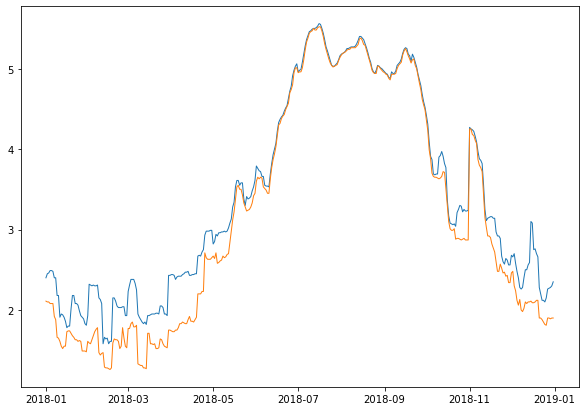

In [20]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ax.plot(data_flt['DATETIME'], data_flt['High'], lw=1)
ax.plot(data_flt['DATETIME'], data_flt['Low'], lw=1)

In [21]:
data_flt.head()

,STATIONID,DATETIME,High,Low,Hour,Month,Day
0,74,2018-01-01,2.40,2.11,0,1,1
1,74,2018-01-02,2.45,2.10,0,1,2
2,74,2018-01-03,2.46,2.10,0,1,3
3,74,2018-01-04,2.49,2.08,0,1,4
4,74,2018-01-05,2.49,2.08,0,1,5


In [48]:
phaseData = pd.DataFrame({
    'DateTime':pd.date_range(start='1/1/2018', end='12/31/2018', freq='1H')})

In [49]:
phaseData['Hour'] = phaseData.apply(lambda x: x['DateTime'].hour, axis=1)
phaseData['Month'] = phaseData.apply(lambda x: x['DateTime'].month, axis=1)
phaseData['Day'] = phaseData.apply(lambda x: x['DateTime'].day, axis=1)

In [50]:
phaseData['radian'] = phaseData.apply(lambda x: x['Hour']*2*np.pi/12, axis=1)
phaseData['High'] = np.nan
phaseData['Low'] = np.nan
phaseData.iloc[20:40]

,DateTime,Hour,Month,Day,radian,High,Low
20,2018-01-01 20:00:00,20,1,1,10.471976,NaN,NaN
21,2018-01-01 21:00:00,21,1,1,10.995574,NaN,NaN
22,2018-01-01 22:00:00,22,1,1,11.519173,NaN,NaN
23,2018-01-01 23:00:00,23,1,1,12.042772,NaN,NaN
24,2018-01-02 00:00:00,0,1,2,0.000000,NaN,NaN
25,2018-01-02 01:00:00,1,1,2,0.523599,NaN,NaN
26,2018-01-02 02:00:00,2,1,2,1.047198,NaN,NaN
27,2018-01-02 03:00:00,3,1,2,1.570796,NaN,NaN
28,2018-01-02 04:00:00,4,1,2,2.094395,NaN,NaN
29,2018-01-02 05:00:00,5,1,2,2.617994,NaN,NaN


In [51]:
for idx, row in phaseData.iterrows():
    dtst = data_flt[(data_flt['Month']==row['Month'])&(data_flt['Day']==row['Day'])]
    hvl = dtst['High'].to_list()[0]
    lvl = dtst['Low'].to_list()[0]
    phaseData.loc[idx, 'High'] = hvl
    phaseData.loc[idx, 'Low'] = lvl
    #print(dtst['High'].to_list()[0], dtst['Low'].to_list()[0])

In [52]:
phaseData['avg'] = phaseData.apply(lambda x: (x['High']+x['Low'])/2, axis=1)

In [53]:
phaseData['dataGen'] = phaseData.apply(lambda x: (0.5*(x['High']-x['Low'])*np.sin(x['radian']))+x['avg'], axis=1)
#phaseData['dataGen'] = phaseData.apply(lambda x: (0.5*(x['High']-x['Low'])*np.sin(x['radian']))+x['avg'], axis=1)
phaseData['sinData'] = phaseData.apply(lambda x: np.sin(x['radian']), axis=1)

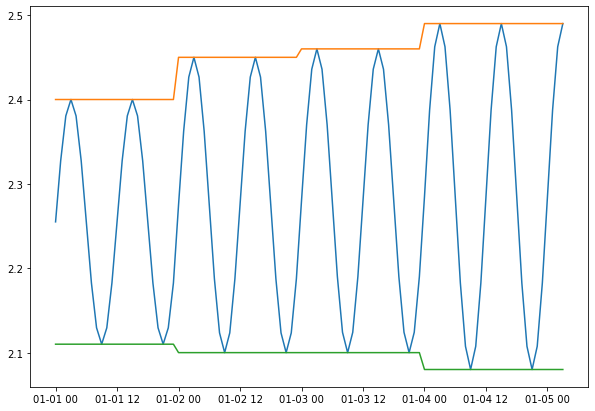

In [54]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
ran = 100
#ax.plot(phaseData['DateTime'].iloc[:ran],phaseData['sinData'].iloc[:ran])
ax.plot(phaseData['DateTime'].iloc[:ran],phaseData['dataGen'].iloc[:ran])
ax.plot(phaseData['DateTime'].iloc[:ran],phaseData['High'].iloc[:ran])
ax.plot(phaseData['DateTime'].iloc[:ran],phaseData['Low'].iloc[:ran])

In [55]:
phaseData

,DateTime,Hour,Month,Day,radian,High,Low,avg,dataGen,sinData
0,2018-01-01 00:00:00,0,1,1,0.000000,2.40,2.11,2.255,2.255000,0.000000
1,2018-01-01 01:00:00,1,1,1,0.523599,2.40,2.11,2.255,2.327500,0.500000
2,2018-01-01 02:00:00,2,1,1,1.047198,2.40,2.11,2.255,2.380574,0.866025
3,2018-01-01 03:00:00,3,1,1,1.570796,2.40,2.11,2.255,2.400000,1.000000
4,2018-01-01 04:00:00,4,1,1,2.094395,2.40,2.11,2.255,2.380574,0.866025
...,...,...,...,...,...,...,...,...,...,...
8732,2018-12-30 20:00:00,20,12,30,10.471976,2.30,1.90,2.100,1.926795,-0.866025
8733,2018-12-30 21:00:00,21,12,30,10.995574,2.30,1.90,2.100,1.900000,-1.000000
8734,2018-12-30 22:00:00,22,12,30,11.519173,2.30,1.90,2.100,1.926795,-0.866025
8735,2018-12-30 23:00:00,23,12,30,12.042772,2.30,1.90,2.100,2.000000,-0.500000


In [56]:
phaseData.to_excel(r"D:\CEGIS PROJECT\DWASA_masterplan_meghna\data\Hydrology Wasa\rawdata\genHourlyDilalpur.xlsx")

In [341]:
dollar_euro = 0.88
drate = 140
print('clr', drate*0.88*1.2)
print('mylr', drate*0.8)

clr 147.84
mylr 112.0
